In [1]:
# Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
import pickle

# Transformations de variables
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, QuantileTransformer, MinMaxScaler
from sklearn.impute import SimpleImputer

# Packages optimisation de modèles
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector
from imblearn.pipeline import Pipeline

# Data Augmentation
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Metrics de ML
from sklearn.metrics import *

# Modèles de ML
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# Afficher toutes les lignes et colonnes
pd.set_option('display.max_columns', None)

In [3]:
# Plot style
plt.style.use('fivethirtyeight')

In [4]:
# Import csv
df_essaiML1 = pd.read_csv(
    r"C:\Users\Damien\Desktop\Data Scientist\P7\Dataset\modifie\essaiML1.csv")
df_essaiML1.head(3)

D:\Users\Damien\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,EMPLOYED_RATIO,LOAN_RATE,DEBT_RATIO,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_TERM,DAYS_EMPLOYED_PERCENT
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.067329,200.788889,12.197778,2.007889,0.121978,0.060749,0.067329
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.070862,479.075000,13.221667,4.790750,0.132217,0.027598,0.070862
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.011814,200.000000,10.000000,2.000000,0.100000,0.050000,0.011814


#### Model V1 (avec pipeline de preprocessing)

In [5]:
df_essaiML1.isna().mean()

SK_ID_CURR                0.000000
TARGET                    0.000000
NAME_CONTRACT_TYPE        0.000000
CODE_GENDER               0.000000
FLAG_OWN_CAR              0.000000
                            ...   
DEBT_RATIO                0.000039
CREDIT_INCOME_PERCENT     0.000000
ANNUITY_INCOME_PERCENT    0.000039
CREDIT_TERM               0.000039
DAYS_EMPLOYED_PERCENT     0.000000
Length: 72, dtype: float64

In [6]:
df_essaiML1 = df_essaiML1.dropna()

In [7]:
df_model2 = pd.DataFrame()
df_model2['target'] = df_essaiML1['TARGET']
df_model2['income_t'] = np.log1p(df_essaiML1['AMT_INCOME_TOTAL'])
df_model2['credit_t'] = np.log1p(df_essaiML1['AMT_CREDIT'])
df_model2['annuity_t'] = np.log1p(df_essaiML1['AMT_ANNUITY'])
df_model2['goods_t'] = np.log1p(df_essaiML1['AMT_GOODS_PRICE'])
df_model2['credit_income_percent'] = df_essaiML1['CREDIT_INCOME_PERCENT']
df_model2['annuity_income_ratio'] = df_essaiML1['ANNUITY_INCOME_PERCENT']
df_model2['credit_term'] = df_essaiML1['CREDIT_TERM']
df_model2['days_employed_percent'] = df_essaiML1['DAYS_EMPLOYED_PERCENT']
df_model2['children_t'] = df_essaiML1['CNT_CHILDREN']
df_model2['gender'] = df_essaiML1['CODE_GENDER']
df_model2['car'] = df_essaiML1['FLAG_OWN_CAR']
df_model2['realty'] = df_essaiML1['FLAG_OWN_REALTY']
df_model2['name_type'] = df_essaiML1['NAME_TYPE_SUITE']
df_model2['income_type'] = df_essaiML1['NAME_INCOME_TYPE']
df_model2['name_education'] = df_essaiML1['NAME_EDUCATION_TYPE']
df_model2['family_status'] = df_essaiML1['NAME_FAMILY_STATUS']
df_model2['house_type'] = df_essaiML1['NAME_HOUSING_TYPE']
df_model2.reset_index(inplace=True)

In [8]:
df_sample2 = df_model2.sample(200000)

In [9]:
X = df_sample2.drop('target', axis=1)
y = df_sample2['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
numerical_features = make_column_selector(dtype_include=np.number)
categorical_features = make_column_selector(dtype_exclude=np.number)
# filtrer par bool ou non bool

In [11]:
#numerical_features = ['income_t', 'credit_t', 'annuity_t', 'goods_t', 'loan', 'employed', 'debt']
#categorical_features = ['children_t', 'gender', 'car', 'realty', 'name_type', 'income_type', 'name_education', 'family_status', 'house_type']

In [12]:
numerical_pipeline = make_pipeline(SimpleImputer())
categorical_pipeline = make_pipeline(SimpleImputer(strategy = 'most_frequent'), 
                                   OneHotEncoder(handle_unknown = 'ignore'))

In [13]:
preprocessor = make_column_transformer((numerical_pipeline, numerical_features),
                      (categorical_pipeline, categorical_features))

In [14]:
# Sortir scaler du preprocessor (essayer quantile scaler)

#### Dummy Classifier

In [15]:
# Estimator
clf_dc = DummyClassifier()

In [16]:
pipe = Pipeline(steps=[("preprocessor", preprocessor), ("dummy", clf_dc)])

In [17]:
param_grid_dc = {
    "dummy__strategy": ['most_frequent', 'constant']}

In [18]:
grid_dc = GridSearchCV(pipe, param_grid=param_grid_dc, verbose=3, n_jobs=-1, cv=3)

In [19]:
grid_dc.fit(X_train, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


D:\Users\Damien\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
3 fits failed out of a total of 6.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\Damien\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Damien\AppData\Roaming\Python\Python38\site-packages\imblearn\pipeline.py", line 272, in fit
    self._final_estimator.fit(Xt, yt, **fit_params_last_step)
  File "D:\Users\Damien\anaconda3\lib\site-packages\sklearn\dummy.py", line 205, in fit
    raise ValueError(
ValueError: Constant target v

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000029E89A380A0>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehotencoder',
                         

In [20]:
y_pred_dc = grid_dc.best_estimator_.predict(X_test)

In [21]:
def print_metrics(y_test, y_pred):
    print('roc_auc_score', roc_auc_score(y_test, y_pred, average=None))
    print('precision_score', precision_score(y_test, y_pred, average='macro'))
    print('recall_score', recall_score(y_test, y_pred, average='macro'))
    print('f1_score', f1_score(y_test, y_pred))

In [22]:
print_metrics(y_test, y_pred_dc)

roc_auc_score 0.5
precision_score 0.4598125
recall_score 0.5
f1_score 0.0


D:\Users\Damien\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

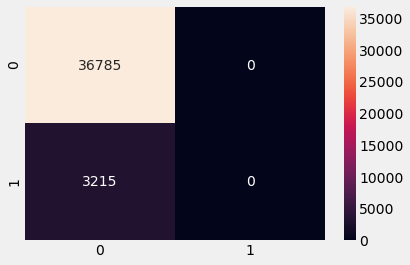

In [23]:
conf_mat_dc = confusion_matrix(y_test, y_pred_dc)
sns.heatmap(conf_mat_dc, annot=True, fmt=".0f")

In [24]:
    # Nombre de True Negatifs
    tn = conf_mat_dc[0, 0]
    # Nombre de Faux Négatifs
    fn = conf_mat_dc[1, 0]
    # Nombre de Faux Positifs
    fp = conf_mat_dc[0, 1]
    # Nombre de True Positifs
    tp = conf_mat_dc[1, 1]

In [25]:
print('Nombre de True Negatifs:', tn)
print('Nombre de Faux Négatifs:', fn)
print('Nombre de Faux Positifs:', fp)
print('Nombre de True Positifs:', tp)

Nombre de True Negatifs: 36785
Nombre de Faux Négatifs: 3215
Nombre de Faux Positifs: 0
Nombre de True Positifs: 0


La métrique f1_score est la moyenne harmonique de la précision et du rappel.
f1_score = 2*(précision x rappel) / (précision + rappel)


Alors que la moyenne ordinaire traite de la même manière toutes les valeurs, la moyenne harmonique donne plus de poids aux faibles valeurs. Par conséquent, le classificateur n'obtiendra un bon score F1 que si son rappel et sa précision sont élevés

La précision est l'exactitude des prédictions positives :

précision = TP / (TP + FP)
TP (abréviation de l'anglais True Positive) est le nombre de vrais positifs et FP est le nombre de faux positifs.

Quant au rappel, c'est le taux d'observations positives ayant été correctement détectées par le classficateur

rappel = TP / (TP + FN)
FN est le nombre de faux positifs.

Plus le recall est haut, plus le modèle repère de positif
Plus la precision est haute, moins le modèle se trompe sur les positifs

#### RandomForest Classifier (Features importance)

In [26]:
# Estimator
clf_rf = RandomForestClassifier()

In [27]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in X_train:
    if X_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(X_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(X_train[col])
            # Transform both training and testing data
            X_train[col] = le.transform(X_train[col])
            X_test[col] = le.transform(X_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

2 columns were label encoded.


In [28]:
# one-hot encoding of categorical variables
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

print('Training Features shape: ', X_train.shape)
print('Testing Features shape: ', X_test.shape)

Training Features shape:  (160000, 45)
Testing Features shape:  (40000, 45)


In [29]:
train_labels = y_train

# Align the training and testing data, keep only columns present in both dataframes
X_train, X_test = X_train.align(X_test, join = 'inner', axis = 1)

# Add the target back in
y_train = train_labels

print('Training Features shape: ', X_train.shape)
print('Testing Features shape: ', X_test.shape)

Training Features shape:  (160000, 44)
Testing Features shape:  (40000, 44)


In [30]:
pipe = Pipeline(steps=[("preprocessor", preprocessor), ("forest", clf_rf)])

In [31]:
param_grid_rf = {
    'forest__n_estimators' : [5,10,50],
    'forest__min_samples_leaf' : [1,5,10], 
    'forest__max_features': ['auto', 'sqrt']
}

In [32]:
grid_rf = GridSearchCV(pipe, param_grid=param_grid_rf, verbose=3, n_jobs=-1, cv=3)

In [33]:
grid_rf.fit(X_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000029E89A380A0>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehotencoder',
                         

In [34]:
domain_features_names = list(X_train.columns)

# Impute the domainnomial features
imputer = SimpleImputer(strategy = 'most_frequent')

domain_features = imputer.fit_transform(X_train)
domain_features_test = imputer.fit_transform(X_test)

# Scale the domainnomial features
scaler = MinMaxScaler()

domain_features = scaler.fit_transform(X_train)
domain_features_test = scaler.fit_transform(X_test)



RF_clf = grid_rf.best_estimator_._final_estimator

# Train on the training data
RF_clf.fit(domain_features, y_train)

# Extract feature importances
feature_importance_values_domain = RF_clf.feature_importances_
feature_importances_domain = pd.DataFrame({'feature': domain_features_names, 'importance': feature_importance_values_domain})

# Make predictions on the test data
predictions = RF_clf.predict_proba(domain_features_test)[:, 1]

In [35]:
# Extract feature importances
feature_importance_values_domain = grid_rf.best_estimator_._final_estimator.feature_importances_

In [36]:
len(feature_importance_values_domain)

44

In [37]:
feature_importance_values_domain

array([1.04032887e-01, 6.03393704e-02, 8.43378292e-02, 9.48126615e-02,
       6.81537693e-02, 9.54963638e-02, 1.02344783e-01, 1.11901211e-01,
       1.20649734e-01, 1.92299383e-02, 1.19112325e-02, 1.32338733e-02,
       6.93971106e-03, 6.74735883e-03, 7.87117256e-04, 5.40520931e-03,
       1.53081360e-06, 2.37618998e-04, 6.05625553e-04, 2.32534770e-03,
       6.63599636e-03, 0.00000000e+00, 5.69113748e-03, 3.95663590e-03,
       2.26002351e-03, 0.00000000e+00, 1.33435393e-04, 9.64961501e-03,
       2.40303250e-06, 7.32266526e-03, 2.11235102e-03, 1.71248835e-03,
       6.45500374e-03, 5.73710296e-03, 1.05919453e-02, 3.93872442e-03,
       7.40913499e-03, 2.03371639e-03, 1.81146996e-04, 5.55074955e-03,
       2.43783831e-03, 6.70280891e-04, 2.06404732e-03, 3.96038606e-03])

In [38]:
dom5ain_features_names = list(X_train.columns)

feature_importances_domain = pd.DataFrame(
    {'feature': domain_features_names, 'importance': feature_importance_values_domain})

In [39]:
y_pred_rf = grid_rf.best_estimator_.predict(X_test)

In [40]:
feature_importances_domain.head(3)

,feature,importance
0,index,0.104033
1,income_t,0.060339
2,credit_t,0.084338


In [41]:
def plot_feature_importances(df):
    """
    Plot importances returned by a model. This can work with any measure of
    feature importance provided that higher importance is better. 
    
    Args:
        df (dataframe): feature importances. Must have the features in a column
        called `features` and the importances in a column called `importance
        
    Returns:
        shows a plot of the 15 most importance features
        
        df (dataframe): feature importances sorted by importance (highest to lowest) 
        with a column for normalized importance
        """
    
    # Sort features according to importance
    df = feature_importances_domain.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    return df

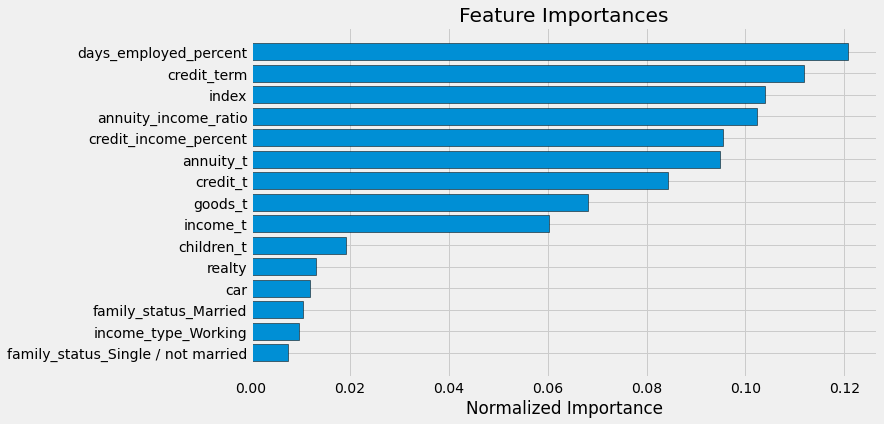

In [42]:
feature_importances_sorted = plot_feature_importances(feature_importances_domain)

#### Pipeline Multi-modèles

**LogisticRegression**

In [43]:
# Estimator
clf_lr = LogisticRegression()

In [44]:
pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("scalers", StandardScaler()),
    ('sampler', RandomUnderSampler()),
    ("estimator", clf_lr)
])

In [45]:
param_grid_lr = {'sampler': [RandomUnderSampler(), SMOTE(), 'passthrough'],
                 'scalers': [StandardScaler(), QuantileTransformer()],
}

In [46]:
grid_lr = GridSearchCV(pipe, param_grid=param_grid_lr, n_jobs=-1, cv=10, verbose=3, scoring=['f1', 'roc_auc'], refit=False)

In [47]:
grid_lr.fit(X_train, y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000001E00003F370>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehotencoder',...
                     

In [48]:
def resultize(grid):
    res = pd.DataFrame(grid.cv_results_)
    col_list = [i for i in res.columns if 'split' not in i]
    res = res[col_list]
    return res

In [49]:
resultize(grid_lr)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_sampler,param_scalers,params,mean_test_f1,std_test_f1,rank_test_f1,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc
0,0.825193,0.077286,0.062632,0.004227,RandomUnderSampler(),StandardScaler(),"{'sampler': RandomUnderSampler(), 'scalers': S...",0.197983,0.004161,4,0.643666,0.006741,5
1,1.630637,0.148861,0.148602,0.022743,RandomUnderSampler(),QuantileTransformer(),"{'sampler': RandomUnderSampler(), 'scalers': Q...",0.202746,0.004083,1,0.651815,0.007794,2
2,9.581470,0.592798,0.074900,0.007985,SMOTE(),StandardScaler(),"{'sampler': SMOTE(), 'scalers': StandardScaler()}",0.198718,0.002836,3,0.641080,0.005771,6
3,11.968938,0.539790,0.144480,0.008024,SMOTE(),QuantileTransformer(),"{'sampler': SMOTE(), 'scalers': QuantileTransf...",0.202645,0.004299,2,0.650478,0.007989,3
4,2.827534,0.201611,0.062034,0.002669,passthrough,StandardScaler(),"{'sampler': 'passthrough', 'scalers': Standard...",0.000154,0.000461,5,0.644454,0.006739,4
5,4.149138,0.287446,0.124566,0.016851,passthrough,QuantileTransformer(),"{'sampler': 'passthrough', 'scalers': Quantile...",0.000000,0.000000,6,0.652674,0.008023,1


**RandomForestClassifier**

In [50]:
# Estimator
clf_rf = RandomForestClassifier()

In [51]:
pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("scalers", StandardScaler()),
    ('sampler', RandomUnderSampler()),
    ("estimator", clf_rf)
])

In [52]:
param_grid_rf = {'sampler': [RandomUnderSampler(), SMOTE(), 'passthrough'],
                 'scalers': [StandardScaler(), QuantileTransformer()],
}

In [53]:
grid_rf = GridSearchCV(pipe, param_grid=param_grid_rf, n_jobs=-1, cv=10, verbose=3, scoring=['f1', 'roc_auc'], refit=False)

In [54]:
grid_rf.fit(X_train, y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


KeyboardInterrupt: 

In [ ]:
resultize(grid_rf)

**GradientBoostingClassifier**

In [ ]:
# Estimator
clf_gb = GradientBoostingClassifier()

In [ ]:
pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("scalers", StandardScaler()),
    ('sampler', RandomUnderSampler()),
    ("estimator", clf_gb)
])

In [ ]:
param_grid_gb = {'sampler': [RandomUnderSampler(), SMOTE(), 'passthrough'],
                 'scalers': [StandardScaler(), QuantileTransformer()],
}

In [ ]:
grid_gb = GridSearchCV(pipe, param_grid=param_grid_gb, n_jobs=-1, cv=10, verbose=3, scoring=['f1', 'roc_auc'], refit=False)

In [ ]:
grid_gb.fit(X_train, y_train)

In [ ]:
resultize(grid_gb)

**LGBMClassifier**

In [ ]:
# Estimator
clf_lgbm = LGBMClassifier()

In [ ]:
pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("scalers", StandardScaler()),
    ('sampler', RandomUnderSampler()),
    ("estimator", clf_lgbm)
])

In [ ]:
param_grid_lgbm = {'sampler': [RandomUnderSampler(), SMOTE(), 'passthrough'],
                   'scalers': [StandardScaler(), QuantileTransformer()],
}

In [ ]:
grid_lgbm = GridSearchCV(pipe, param_grid=param_grid_lgbm, n_jobs=-1, cv=10, verbose=3, scoring=['f1', 'roc_auc'], refit=False)

In [ ]:
grid_lgbm.fit(X_train, y_train)

In [ ]:
resultize(grid_lgbm)

**XGBClassifier**

In [ ]:
# Estimator
clf_xgbc = XGBClassifier()

In [ ]:
pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("scalers", StandardScaler()),
    ('sampler', RandomUnderSampler()),
    ("estimator", clf_xgbc)
])

In [ ]:
param_grid_xgbc = {'sampler': [RandomUnderSampler(), SMOTE(), 'passthrough'],
                   'scalers': [StandardScaler(), QuantileTransformer()],
}

In [ ]:
grid_xgbc = GridSearchCV(pipe, param_grid=param_grid_xgbc, n_jobs=-1, cv=10, verbose=3, scoring=['f1', 'roc_auc'], refit=False)

In [ ]:
grid_xgbc.fit(X_train, y_train)

In [ ]:
resultize(grid_xgbc)

In [ ]:
# Liste de classifieurs
# estimators = [LogisticRegression(), RandomForestClassifier(),
              # GradientBoostingClassifier(), LGBMClassifier(), 
              # XGBClassifier()
#]

In [ ]:
# Estimator
# clf_lr = LogisticRegression()

In [ ]:
# pipe = Pipeline([
    # ("preprocessor", preprocessor),
    # ("scalers", StandardScaler()),
    # ('sampler', RandomUnderSampler()),
    # ("estimator", clf_lr)
# ])

In [ ]:
# param_grid_lr = {'estimator': estimators,
                 # 'sampler': [RandomUnderSampler(), SMOTE(), 'passthrough'],
                 # 'scalers': [StandardScaler(), QuantileTransformer()]
# }

In [ ]:
# grid_lr = GridSearchCV(pipe, param_grid=param_grid_lr, n_jobs=-1, cv=10, verbose=3, scoring='f1')

In [ ]:
# grid_lr.fit(X_train, y_train)

In [ ]:
# resultize(grid_lr)

#### Curves

In [ ]:
# Dictionnaire de classifieurs 
# classifiers_1 = { 'Dummy Classifier': DummyClassifier(),
                  #'Logistic Regression': LogisticRegression(),
                  #'Random Forest': RandomForestClassifier(n_estimators=100),
                  #'Xgboost': XGBClassifier(),
                  #'LGBM': LGBMClassifier()
              #}

In [ ]:
# Pipeline de transformations + classification
# def define_pipeline(preprocessor, classifier) :
    
    # pipe = Pipeline([("preprocess", preprocessor),
                     # ("regressor", classifier),
                    # ])
    # return pipe

In [ ]:
#from sklearn.model_selection import cross_val_score, cross_val_predict
#from sklearn.model_selection import cross_validate
#from sklearn.calibration import calibration_curve, CalibratedClassifierCV
#from sklearn.model_selection import KFold, StratifiedKFold
#from sklearn.model_selection import train_test_split

In [ ]:
#def plot_roc_curve(classifiers, var_pipeline, X, y, n_splits=5, fit=True):

    #kf = KFold(n_splits=n_splits)    
    #for name_clf, clf in classifiers.items():
        #print(name_clf)
        #tprs = []
        #aucs = []
        #mean_fpr = np.linspace(0, 1, 100)
        #for i, (train, test) in enumerate(kf.split(X, y)):

            #full_pipeline = define_pipeline(var_pipeline, clf)
            
            #if fit :
                #full_pipeline.fit(X.iloc[train, :], y.iloc[train])

           # y_pred_grd = full_pipeline.predict_proba(X.iloc[test, :])[:, 1]
            #fpr, tpr, _ = roc_curve(y.iloc[test], y_pred_grd)

           # interp_tpr = np.interp(mean_fpr, fpr, tpr)
           # interp_tpr[0] = 0.0
           # tprs.append(interp_tpr)
           # auc_ = auc(fpr, tpr)

           # aucs.append(auc_)

        #mean_tpr = np.mean(tprs, axis=0)
       # mean_tpr[-1] = 1.0
       # mean_auc = auc(mean_fpr, mean_tpr)
       # std_auc = np.std(aucs)
        #plt.plot(mean_fpr, mean_tpr,
            #label=name_clf + r'(AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
            #lw=2,
           # alpha=.8)

    #plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    #plt.xlim([0.0, 1.0])
    #plt.ylim([0.0, 1.05])
    #plt.xlabel('False Positive Rate')
    #plt.ylabel('True Positive Rate')
    #plt.title('Receiver operating characteristic example')
    #plt.legend(loc="lower right")
    #plt.show()

In [ ]:
# Affichage de la courbe ROC pour les différents modèles testés
#plot_roc_curve(classifiers_1, preprocessor, X_train, y_train)

In [ ]:
#y_pred_lr = grid_lr.best_estimator_.predict(X_test)

In [ ]:
# Classe weight mettre 9x plus de poinds à la classe minoritaire
# Bosser sur methode du chapelet (qui apporte le plus et le retribuer en fonction de son apport (module chap))

In [ ]:
# print_metrics(y_test, y_pred_lr)

In [ ]:
# Estimator
# clf_gb = GradientBoostingClassifier()

#### LGBN Classifier + hyper-paramètres + class weight

**Class Weight**

In [43]:
# Estimator
clf_lgbn = LGBMClassifier(class_weight='balanced')

In [44]:
pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("scalers", StandardScaler()),
    ('sampler', RandomUnderSampler()),
    ("estimator", clf_lgbn)
])

In [45]:
param_grid_lgbn = {
    'estimator__n_estimators' : [5,10,50],
    'estimator__num_leaves ' : [1,5,10], 
    'estimator__boosting_type ': ['gbdt', 'dart', 'goss', 'rf']
}

In [46]:
grid_lgbn = GridSearchCV(pipe, param_grid=param_grid_lgbn,
                         n_jobs=-1, cv=5, verbose=3, scoring='roc_auc')

In [47]:
grid_lgbn.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[LightGBM] [Warning] boosting_type is set=gbdt, boosting_type= will be ignored. Current value: boosting_type=gbdt
[LightGBM] [Warning] num_leaves is set=31, num_leaves= will be ignored. Current value: num_leaves=31
[LightGBM] [Warning] Unknown parameter: 10
[LightGBM] [Warning] Unknown parameter: gbdt


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000029E89A380A0>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehotencoder',
                         

In [48]:
LGBN_best_clf = grid_lgbn.best_estimator_._final_estimator

In [49]:
y_pred_lgbn = grid_lgbn.best_estimator_.predict(X_test)

In [50]:
print_metrics(y_test, y_pred_lgbn)

roc_auc_score 0.6372401650463129
precision_score 0.543911677254034
recall_score 0.6372401650463129
f1_score 0.22323899903971078


<AxesSubplot:>

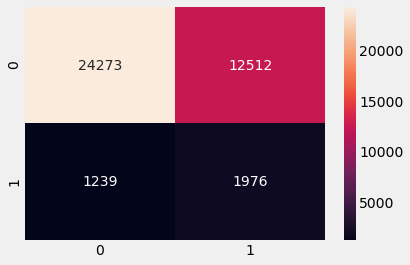

In [51]:
conf_mat_gb = confusion_matrix(y_test, y_pred_lgbn)
sns.heatmap(conf_mat_gb, annot=True, fmt=".0f")

In [52]:
    # Nombre de True Negatifs
    tn_gb = conf_mat_gb[0, 0]
    # Nombre de Faux Négatifs
    fn_gb = conf_mat_gb[1, 0]
    # Nombre de Faux Positifs
    fp_gb = conf_mat_gb[0, 1]
    # Nombre de True Positifs
    tp_gb = conf_mat_gb[1, 1]

In [53]:
print('Nombre de True Negatifs:', tn_gb)
print('Nombre de Faux Négatifs:', fn_gb)
print('Nombre de Faux Positifs:', fp_gb)
print('Nombre de True Positifs:', tp_gb)

Nombre de True Negatifs: 24273
Nombre de Faux Négatifs: 1239
Nombre de Faux Positifs: 12512
Nombre de True Positifs: 1976


#### SHAP

In [54]:
import shap

In [55]:
shap.initjs()

In [56]:
df_essaiML1.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,EMPLOYED_RATIO,LOAN_RATE,DEBT_RATIO,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_TERM,DAYS_EMPLOYED_PERCENT
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.067329,200.788889,12.197778,2.007889,0.121978,0.060749,0.067329
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.070862,479.075000,13.221667,4.790750,0.132217,0.027598,0.070862
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.011814,200.000000,10.000000,2.000000,0.100000,0.050000,0.011814


In [57]:
data_for_prediction = X_train.iloc[5]

In [58]:
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)

In [59]:
LGBN_best_clf.predict_proba(data_for_prediction_array)

array([[0.69226923, 0.30773077]])

In [60]:
explainer = shap.TreeExplainer(LGBN_best_clf)

In [61]:
explainer = shap.TreeExplainer(LGBN_best_clf)
shap_values = explainer.shap_values(data_for_prediction_array)
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction_array, feature_names=X_train.columns)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


In [62]:
explainer = shap.TreeExplainer(LGBN_best_clf)

i=5
features=X_train.iloc[i].values.reshape(1, -1)

shap_values = explainer.shap_values(features)
shap.force_plot(explainer.expected_value[1], shap_values[1], features, feature_names=X_train.columns)

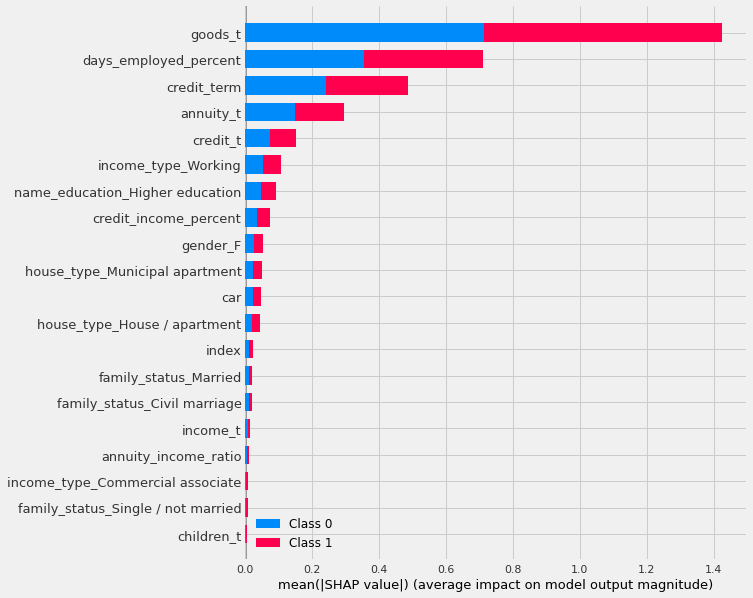

In [63]:
shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns)

In [64]:
# Theorie des mariages stables
# Concurrent 
# 

#### Model V2

In [65]:
# Import csv
df_essaiML2 = pd.read_csv(
    r"C:\Users\Damien\Desktop\Data Scientist\P7\Dataset\modifie\essai2.csv")
df_essaiML2.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: 

In [66]:
# Fonction cleaning colonnes
def clean_col(i):
    return i.lower().strip().replace(" ","_").replace("__","_").replace("(","P").replace(")","P").replace("$","usd").replace("%","PC").replace("�","e")

In [67]:
# Clean noms colonnes
df_essaiML2.columns = [clean_col(i) for i in df_essaiML2.columns]

In [68]:
import re
df_essaiML2 = df_essaiML2.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [69]:
df_sample3 = df_essaiML2.sample(200000)

In [70]:
X2 = df_sample3.drop('target', axis=1)
y2 = df_sample3['target']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2)

In [71]:
# Estimator
clf_lgbn = LGBMClassifier(class_weight='balanced')

In [72]:
pipe = Pipeline([
    ("scalers", StandardScaler()),
    ('sampler', RandomUnderSampler()),
    ("estimator", clf_lgbn)
])

In [73]:
param_grid_lgbn = {
    'estimator__n_estimators' : [5,10,50],
    'estimator__num_leaves ' : [1,5,10], 
    'estimator__boosting_type ': ['gbdt', 'dart', 'goss', 'rf']
}

In [74]:
grid_lgbn = GridSearchCV(pipe, param_grid=param_grid_lgbn,
                         n_jobs=-1, cv=5, verbose=3, scoring='roc_auc')

In [75]:
grid_lgbn.fit(X_train2, y_train2)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[LightGBM] [Warning] boosting_type is set=gbdt, boosting_type= will be ignored. Current value: boosting_type=gbdt
[LightGBM] [Warning] num_leaves is set=31, num_leaves= will be ignored. Current value: num_leaves=31
[LightGBM] [Warning] Unknown parameter: rf
[LightGBM] [Warning] Unknown parameter: 1


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scalers', StandardScaler()),
                                       ('sampler', RandomUnderSampler()),
                                       ('estimator',
                                        LGBMClassifier(class_weight='balanced'))]),
             n_jobs=-1,
             param_grid={'estimator__boosting_type ': ['gbdt', 'dart', 'goss',
                                                       'rf'],
                         'estimator__n_estimators': [5, 10, 50],
                         'estimator__num_leaves ': [1, 5, 10]},
             scoring='roc_auc', verbose=3)

In [76]:
LGBN_best_clf2 = grid_lgbn.best_estimator_

In [77]:
y_pred_lgbn = LGBN_best_clf2.predict(X_test2)

In [78]:
print_metrics(y_test2, y_pred_lgbn)

roc_auc_score 0.6754801924765212
precision_score 0.5575172859912797
recall_score 0.6754801924765212
f1_score 0.25266882925390743


<AxesSubplot:>

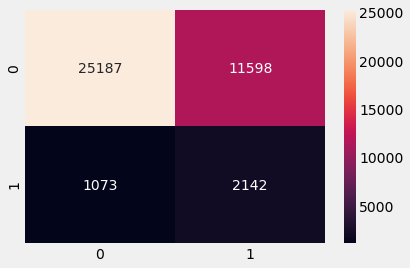

In [79]:
conf_mat_gb = confusion_matrix(y_test2, y_pred_lgbn)
sns.heatmap(conf_mat_gb, annot=True, fmt=".0f")

#### Import bureau.csv

In [80]:
bureau = pd.read_csv(
    r"C:\Users\Damien\Desktop\Data Scientist\P7\Dataset\source\bureau.csv")
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


**Numercial values**

In [81]:
# Groupby id (SK_ID_CURR), count the number of previous loans, and rename the column
previous_loan_counts = bureau.groupby('SK_ID_CURR', as_index=False)['SK_ID_BUREAU'].count().rename(columns = {'SK_ID_BUREAU': 'previous_loan_counts'})
previous_loan_counts.head()

,SK_ID_CURR,previous_loan_counts
0,100001,7
1,100002,8
2,100003,4
3,100004,2
4,100005,3


In [82]:
# Clean columns writings
previous_loan_counts.columns = [clean_col(i) for i in previous_loan_counts.columns]

In [83]:
# Join to the training dataframe
train = df_essaiML2.merge(previous_loan_counts, on = 'sk_id_curr', how = 'left')

# Fill the missing values with 0 
train['previous_loan_counts'] = train['previous_loan_counts'].fillna(0)
train.head()

,sk_id_curr,target,name_contract_type,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,cnt_fam_members,region_rating_client,region_rating_client_w_city,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,ext_source_2,ext_source_3,years_beginexpluatation_avg,floorsmax_avg,years_beginexpluatation_mode,floorsmax_mode,years_beginexpluatation_medi,floorsmax_medi,totalarea_mode,emergencystate_mode,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year,code_gender_f,code_gender_m,code_gender_xna,name_type_suite_children,name_type_suite_family,name_type_suite_group_of_people,name_type_suite_other_a,name_type_suite_other_b,name_type_suite_spouse_partner,name_type_suite_unaccompanied,name_income_type_businessman,name_income_type_commercial_associate,name_income_type_maternity_leave,name_income_type_pensioner,name_income_type_state_servant,name_income_type_student,name_income_type_unemployed,name_income_type_working,name_education_type_academic_degree,name_education_type_higher_education,name_education_type_incomplete_higher,name_education_type_lower_secondary,name_education_type_secondary__secondary_special,name_family_status_civil_marriage,name_family_status_married,name_family_status_separated,name_family_status_single__not_married,name_family_status_unknown,name_family_status_widow,name_housing_type_coop_apartment,name_housing_type_house__apartment,name_housing_type_municipal_apartment,name_housing_type_office_apartment,name_housing_type_rented_apartment,name_housing_type_with_parents,occupation_type_accountants,occupation_type_cleaning_staff,occupation_type_cooking_staff,occupation_type_core_staff,occupation_type_drivers,occupation_type_hr_staff,occupation_type_high_skill_tech_staff,occupation_type_it_staff,occupation_type_laborers,occupation_type_lowskill_laborers,occupation_type_managers,occupation_type_medicine_staff,occupation_type_private_service_staff,occupation_type_realty_agents,occupation_type_sales_staff,occupation_type_secretaries,occupation_type_security_staff,occupation_type_waitersbarmen_staff,weekday_appr_process_start_friday,weekday_appr_process_start_monday,weekday_appr_process_start_saturday,weekday_appr_process_start_sunday,weekday_appr_process_start_thursday,weekday_appr_process_start_tuesday,weekday_appr_process_start_wednesday,organization_type_advertising,organization_type_agriculture,organization_type_bank,organization_type_business_entity_type_1,organization_type_business_entity_type_2,organization_type_business_entity_type_3,organization_type_cleaning,organization_type_construction,organization_type_culture,organization_type_electricity,organization_type_emergency,organization_type_government,organization_type_hotel,organization_type_housing,organization_type_industry_type_1,organization_type_industry_type_10,organization_type_industry_type_11,organization_type_industry_type_12,organization_type_industry_type_13,organization_type_industry_type_2,organization_type_industry_type_3,organization_type_industry_type_4,organization_type_industry_type_5,organization_type_industry_type_6,organization_type_industry_type_7,organization_

In [84]:
# Group by the client id, calculate aggregation statistics
bureau_agg = bureau.drop(columns = ['SK_ID_BUREAU']).groupby('SK_ID_CURR', as_index = False).agg(['count', 'mean', 'max', 'min', 'sum']).reset_index()
bureau_agg.head()

SK_ID_CURR DAYS_CREDIT                               CREDIT_DAY_OVERDUE  \
                   count         mean  max   min   sum              count   
0     100001           7  -735.000000  -49 -1572 -5145                  7   
1     100002           8  -874.000000 -103 -1437 -6992                  8   
2     100003           4 -1400.750000 -606 -2586 -5603                  4   
3     100004           2  -867.000000 -408 -1326 -1734                  2   
4     100005           3  -190.666667  -62  -373  -572                  3   

                   DAYS_CREDIT_ENDDATE                                      \
  mean max min sum               count        mean     max     min     sum   
0  0.0   0   0   0                   7   82.428571  1778.0 -1329.0   577.0   
1  0.0   0   0   0                   6 -349.000000   780.0 -1072.0 -2094.0   
2  0.0   0   0   0                   4 -544.500000  1216.0 -2434.0 -2178.0   
3  0.0   0   0   0                   2 -488.500000  -382.0  -595.0  -977.0   
4  0.0   0   0   0                   3  439.333333  1324.0  -128.0  1318.0   

  DAYS_ENDDATE_FACT                                      \
              count         mean    max     min     sum   
0                 4  -825.500000 -544.0 -1328.0 -3302.0   
1                 6  -697.500000  -36.0 -1185.0 -4185.0   
2                 3 -1097.333333 -540.0 -2131.0 -3292.0   
3                 2  -532.500000 -382.0  -683.0 -1065.0   
4                 1  -123.000000 -123.0  -123.0  -123.0   

  AMT_CREDIT_MAX_OVERDUE                                     \
                   count      mean       max  min       sum   
0                      0       NaN       NaN  NaN     0.000   
1                      5  1681.029  5043.645  0.0  8405.145   
2                      4     0.000     0.000  0.0     0.000   
3                      1     0.000     0.000  0.0     0.000   
4                      1     0.000     0.000  0.0     0.000   

  CNT_CREDIT_PROLONG                  AMT_CREDIT_SUM                           \
               count mean max min sum          count           mean       max   
0                  7  0.0   0   0   0              7  207623.571429  378000.0   
1                  8  0.0   0   0   0              8  108131.945625  450000.0   
2                  4  0.0   0   0   0              4  254350.125000  810000.0   
3                  2  0.0   0   0   0              2   94518.900000   94537.8   
4                  3  0.0   0   0   0              3  219042.000000  568800.0   

                        AMT_CREDIT_SUM_DEBT                                \
       min          sum               count           mean       max  min   
0  85500.0  1453365.000                   7   85240.928571  373239.0  0.0   
1      0.0   865055.565                   5   49156.200000  245781.0  0.0   
2  22248.0  1017400.500                   4       0.000000       0.0  0.0   
3  94500.0   189037.800                   2       0.000000       0.0  0.0   
4  29826.0   657126.000                   3  189469.500000  543087.0  0.0   

            AMT_CREDIT_SUM_LIMIT                                             \
        sum                count          mean         max  min         sum   
0  596686.5                    6       0.00000       0.000  0.0       0.000   
1  245781.0                    4    7997.14125   31988.565  0.0   31988.565   
2       0.0                    4  202500.00000  810000.000  0.0  810000.000   
3       0.0                    2       0.00000       0.000  0.0       0.000   
4  568408.5                    3       0.00000       0.000  0.0       0.000   

  AMT_CREDIT_SUM_OVERDUE                     DAYS_CREDIT_UPDATE              \
                   count mean  max  min  sum              count        mean   
0                      7  0.0  0.0  0.0  0.0                  7  -93.142857   
1                      8  0.0  0.0  0.0  0.0                  8 -499.875000   
2                      4  0.0  0.0  0.0  0.0                  4 -816.000000   
3 

In [85]:
# List of column names
columns = ['SK_ID_CURR']

# Iterate through the variables names
for var in bureau_agg.columns.levels[0]:
    # Skip the id name
    if var != 'SK_ID_CURR':
        
        # Iterate through the stat names
        for stat in bureau_agg.columns.levels[1][:-1]:
            # Make a new column name for the variable and stat
            columns.append('bureau_%s_%s' % (var, stat))

In [86]:
# Assign the list of columns names as the dataframe column names
bureau_agg.columns = columns
bureau_agg.columns = [clean_col(i) for i in bureau_agg.columns]
bureau_agg.head()

,sk_id_curr,bureau_days_credit_count,bureau_days_credit_mean,bureau_days_credit_max,bureau_days_credit_min,bureau_days_credit_sum,bureau_credit_day_overdue_count,bureau_credit_day_overdue_mean,bureau_credit_day_overdue_max,bureau_credit_day_overdue_min,bureau_credit_day_overdue_sum,bureau_days_credit_enddate_count,bureau_days_credit_enddate_mean,bureau_days_credit_enddate_max,bureau_days_credit_enddate_min,bureau_days_credit_enddate_sum,bureau_days_enddate_fact_count,bureau_days_enddate_fact_mean,bureau_days_enddate_fact_max,bureau_days_enddate_fact_min,bureau_days_enddate_fact_sum,bureau_amt_credit_max_overdue_count,bureau_amt_credit_max_overdue_mean,bureau_amt_credit_max_overdue_max,bureau_amt_credit_max_overdue_min,bureau_amt_credit_max_overdue_sum,bureau_cnt_credit_prolong_count,bureau_cnt_credit_prolong_mean,bureau_cnt_credit_prolong_max,bureau_cnt_credit_prolong_min,bureau_cnt_credit_prolong_sum,bureau_amt_credit_sum_count,bureau_amt_credit_sum_mean,bureau_amt_credit_sum_max,bureau_amt_credit_sum_min,bureau_amt_credit_sum_sum,bureau_amt_credit_sum_debt_count,bureau_amt_credit_sum_debt_mean,bureau_amt_credit_sum_debt_max,bureau_amt_credit_sum_debt_min,bureau_amt_credit_sum_debt_sum,bureau_amt_credit_sum_limit_count,bureau_amt_credit_sum_limit_mean,bureau_amt_credit_sum_limit_max,bureau_amt_credit_sum_limit_min,bureau_amt_credit_sum_limit_sum,bureau_amt_credit_sum_overdue_count,bureau_amt_credit_sum_overdue_mean,bureau_amt_credit_sum_overdue_max,bureau_amt_credit_sum_overdue_min,bureau_amt_credit_sum_overdue_sum,bureau_days_credit_update_count,bureau_days_credit_update_mean,bureau_days_credit_update_max,bureau_days_credit_update_min,bureau_days_credit_update_sum,bureau_amt_annuity_count,bureau_amt_annuity_mean,bureau_amt_annuity_max,bureau_amt_annuity_min,bureau_amt_annuity_sum
0,100001,7,-735.000000,-49,-1572,-5145,7,0.0,0,0,0,7,82.428571,1778.0,-1329.0,577.0,4,-825.500000,-544.0,-1328.0,-3302.0,0,NaN,NaN,NaN,0.000,7,0.0,0,0,0,7,207623.571429,378000.0,85500.0,1453365.000,7,85240.928571,373239.0,0.0,596686.5,6,0.00000,0.000,0.0,0.000,7,0.0,0.0,0.0,0.0,7,-93.142857,-6,-155,-652,7,3545.357143,10822.5,0.0,24817.5
1,100002,8,-874.000000,-103,-1437,-6992,8,0.0,0,0,0,6,-349.000000,780.0,-1072.0,-2094.0,6,-697.500000,-36.0,-1185.0,-4185.0,5,1681.029,5043.645,0.0,8405.145,8,0.0,0,0,0,8,108131.945625,450000.0,0.0,865055.565,5,49156.200000,245781.0,0.0,245781.0,4,7997.14125,31988.565,0.0,31988.565,8,0.0,0.0,0.0,0.0,8,-499.875000,-7,-1185,-3999,7,0.000000,0.0,0.0,0.0
2,100003,4,-1400.750000,-606,-2586,-5603,4,0.0,0,0,0,4,-544.500000,1216.0,-2434.0,-2178.0,3,-1097.333333,-540.0,-2131.0,-3292.0,4,0.000,0.000,0.0,0.000,4,0.0,0,0,0,4,254350.125000,810000.0,22248.0,1017400.500,4,0.000000,0.0,0.0,0.0,4,202500.00000,810000.000,0.0,810000.000,4,0.0,0.0,0.0,0.0,4,-816.000000,-43,-2131,-3264,0,NaN,NaN,NaN,0.0
3,100004,2,-867.000000,-408,-1326,-1734,2,0.0,0,0,0,2,-488.500000,-382.0,-595.0,-977.0,2,-532.500000,-382.0,-683.0,-1065.0,1,0.000,0.000,0.0,0.000,2,0.0,0,0,0,2,94518.900000,94537.8,94500.0,189037.800,2,0.000000,0.0,0.0,0.0,2,0.00000,0.000,0.0,0.000,2,0.0,0.0,0.0,0.0,2,-532.000000,-382,-682,-1064,0,NaN,NaN,NaN,0.0
4,100005,3,-190.666667,-62,-373,-572,3,0.0,0,0,0,3,439.333333,1324.0,-128.0,1318.0,1,-123.000000,-123.0,-123.0,-123.0,1,0.000,0.000,0.0,0.000,3,0.0,0,0,0,3,219042.000000,568800.0,29826.0,657126.000,3,189469.500000,543087.0,0.0,568408.5,3,0.00000,0.000,0.0,0.000,3,0.0,0.0,0.0,0.0,3,-54.333333,-11,-121,-163,3,1420.500000,4261.5,0.0,4261.5


In [87]:
# Merge with the training data
train = train.merge(bureau_agg, on = 'sk_id_curr', how = 'left')
train.head()

,sk_id_curr,target,name_contract_type,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,cnt_fam_members,region_rating_client,region_rating_client_w_city,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,ext_source_2,ext_source_3,years_beginexpluatation_avg,floorsmax_avg,years_beginexpluatation_mode,floorsmax_mode,years_beginexpluatation_medi,floorsmax_medi,totalarea_mode,emergencystate_mode,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year,code_gender_f,code_gender_m,code_gender_xna,name_type_suite_children,name_type_suite_family,name_type_suite_group_of_people,name_type_suite_other_a,name_type_suite_other_b,name_type_suite_spouse_partner,name_type_suite_unaccompanied,name_income_type_businessman,name_income_type_commercial_associate,name_income_type_maternity_leave,name_income_type_pensioner,name_income_type_state_servant,name_income_type_student,name_income_type_unemployed,name_income_type_working,name_education_type_academic_degree,name_education_type_higher_education,name_education_type_incomplete_higher,name_education_type_lower_secondary,name_education_type_secondary__secondary_special,name_family_status_civil_marriage,name_family_status_married,name_family_status_separated,name_family_status_single__not_married,name_family_status_unknown,name_family_status_widow,name_housing_type_coop_apartment,name_housing_type_house__apartment,name_housing_type_municipal_apartment,name_housing_type_office_apartment,name_housing_type_rented_apartment,name_housing_type_with_parents,occupation_type_accountants,occupation_type_cleaning_staff,occupation_type_cooking_staff,occupation_type_core_staff,occupation_type_drivers,occupation_type_hr_staff,occupation_type_high_skill_tech_staff,occupation_type_it_staff,occupation_type_laborers,occupation_type_lowskill_laborers,occupation_type_managers,occupation_type_medicine_staff,occupation_type_private_service_staff,occupation_type_realty_agents,occupation_type_sales_staff,occupation_type_secretaries,occupation_type_security_staff,occupation_type_waitersbarmen_staff,weekday_appr_process_start_friday,weekday_appr_process_start_monday,weekday_appr_process_start_saturday,weekday_appr_process_start_sunday,weekday_appr_process_start_thursday,weekday_appr_process_start_tuesday,weekday_appr_process_start_wednesday,organization_type_advertising,organization_type_agriculture,organization_type_bank,organization_type_business_entity_type_1,organization_type_business_entity_type_2,organization_type_business_entity_type_3,organization_type_cleaning,organization_type_construction,organization_type_culture,organization_type_electricity,organization_type_emergency,organization_type_government,organization_type_hotel,organization_type_housing,organization_type_industry_type_1,organization_type_industry_type_10,organization_type_industry_type_11,organization_type_industry_type_12,organization_type_industry_type_13,organization_type_industry_type_2,organization_type_industry_type_3,organization_type_industry_type_4,organization_type_industry_type_5,organization_type_industry_type_6,organization_type_industry_type_7,organization_

In [88]:
# List of new correlations
new_corrs = []

# Iterate through the columns 
for col in bureau_agg.columns:
    if col != 'SK_ID_CURR':
        # Calculate correlation with the target
        corr = train['target'].corr(train[col])
        # Append the list as a tuple
        new_corrs.append((col, corr))

In [89]:
# Sort the correlations by the absolute value
# Make sure to reverse to put the largest values at the front of list
new_corrs = sorted(new_corrs, key = lambda x: abs(x[1]), reverse = True)
new_corrs[:15]

[('bureau_days_credit_mean', 0.089728967219981),
 ('bureau_days_credit_min', 0.07524825103010374),
 ('bureau_days_credit_update_mean', 0.06892735266968684),
 ('bureau_days_enddate_fact_min', 0.055887379843920795),
 ('bureau_days_credit_enddate_sum', 0.053734895601020585),
 ('bureau_days_enddate_fact_mean', 0.05319962585758622),
 ('bureau_days_credit_max', 0.04978205463997309),
 ('bureau_days_enddate_fact_sum', 0.048853502611115936),
 ('bureau_days_credit_enddate_mean', 0.04698275433483553),
 ('bureau_days_credit_update_min', 0.04286392247073023),
 ('bureau_days_credit_sum', 0.04199982481484667),
 ('bureau_days_credit_update_sum', 0.0414036353530601),
 ('bureau_days_credit_enddate_max', 0.03658963469632898),
 ('bureau_days_credit_enddate_min', 0.034281109921615996),
 ('bureau_days_enddate_fact_count', -0.03049230665332547)]

**Categorical values**

In [90]:
categorical = pd.get_dummies(bureau.select_dtypes('object'))
categorical['SK_ID_CURR'] = bureau['SK_ID_CURR']
categorical.head()

,CREDIT_ACTIVE_Active,CREDIT_ACTIVE_Bad debt,CREDIT_ACTIVE_Closed,CREDIT_ACTIVE_Sold,CREDIT_CURRENCY_currency 1,CREDIT_CURRENCY_currency 2,CREDIT_CURRENCY_currency 3,CREDIT_CURRENCY_currency 4,CREDIT_TYPE_Another type of loan,CREDIT_TYPE_Car loan,CREDIT_TYPE_Cash loan (non-earmarked),CREDIT_TYPE_Consumer credit,CREDIT_TYPE_Credit card,CREDIT_TYPE_Interbank credit,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for purchase of shares (margin lending),CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mobile operator loan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Real estate loan,CREDIT_TYPE_Unknown type of loan,SK_ID_CURR
0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,215354
1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,215354
2,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,215354
3,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,215354
4,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,215354


In [91]:
categorical_grouped = categorical.groupby('SK_ID_CURR').agg(['sum', 'mean']).reset_index()
categorical_grouped.head()

SK_ID_CURR CREDIT_ACTIVE_Active           CREDIT_ACTIVE_Bad debt       \
                              sum      mean                    sum mean   
0     100001                    3  0.428571                      0  0.0   
1     100002                    2  0.250000                      0  0.0   
2     100003                    1  0.250000                      0  0.0   
3     100004                    0  0.000000                      0  0.0   
4     100005                    2  0.666667                      0  0.0   

  CREDIT_ACTIVE_Closed           CREDIT_ACTIVE_Sold       \
                   sum      mean                sum mean   
0                    4  0.571429                  0  0.0   
1                    6  0.750000                  0  0.0   
2                    3  0.750000                  0  0.0   
3                    2  1.000000                  0  0.0   
4                    1  0.333333                  0  0.0   

  CREDIT_CURRENCY_currency 1      CREDIT_CURRENCY_currency 2       \
                         sum mean                        sum mean   
0                          7  1.0                          0  0.0   
1                          8  1.0                          0  0.0   
2                          4  1.0                          0  0.0   
3                          2  1.0                          0  0.0   
4                          3  1.0                          0  0.0   

  CREDIT_CURRENCY_currency 3      CREDIT_CURRENCY_currency 4       \
                         sum mean                        sum mean   
0                          0  0.0                          0  0.0   
1                          0  0.0                          0  0.0   
2                          0  0.0                          0  0.0   
3                          0  0.0                          0  0.0   
4                          0  0.0                          0  0.0   

  CREDIT_TYPE_Another type of loan      CREDIT_TYPE_Car loan       \
                               sum mean                  sum mean   
0                                0  0.0                    0  0.0   
1                                0  0.0                    0  0.0   
2                                0  0.0                    0  0.0   
3                                0  0.0                    0  0.0   
4                                0  0.0                    0  0.0   

  CREDIT_TYPE_Cash loan (non-earmarked)      CREDIT_TYPE_Consumer credit  \
                                    sum mean                         sum   
0                                     0  0.0                           7   
1                                     0  0.0                           4   
2                                     0  0.0                           2   
3                                     0  0.0                           2   
4                                     0  0.0                           2   

            CREDIT_TYPE_Credit card           CREDIT_TYPE_Interbank credit  \
       mean                     sum      mean                          sum   
0  1.000000                       0  0.000000                            0   
1  0.500000                       4  0.500000                            0   
2  0.500000                       2  0.500000                            0   
3  1.000000                       0  0.000000                            0   
4  0.666667                       1  0.333333                            0   

       CREDIT_TYPE_Loan for business development       \
  mean                                       sum mean   
0  0.0                                         0  0.0   
1  0.0                                         0  0.0   
2  0.0                                         0  0.0   
3  0.0                                         0  0.0   
4  0.0                                         0  0.0   

  CREDIT_TYPE_Loan for purchase of shares (margin lending)       \
                                                       s

In [92]:
# Need to create new column names
columns = ['SK_ID_CURR']

# Iterate through the variables names
for var in categorical_grouped.columns.levels[0]:
    # Skip the grouping variable
    if var != 'SK_ID_CURR':
        
        # Iterate through the stat names
        for stat in categorical_grouped.columns.levels[1][:-1]:
            # Make a new column name for the variable and stat
            columns.append('%s_%s' % (var, stat))

In [93]:
categorical_grouped.columns = columns

In [94]:
# Assign the list of columns names as the dataframe column names
categorical_grouped.columns = [clean_col(i) for i in categorical_grouped.columns]

In [95]:
train = train.merge(categorical_grouped, left_on = 'sk_id_curr', right_index = True, how = 'left')
train = train.rename(columns={'sk_id_curr_x': 'sk_id_curr'})
train.head()

,sk_id_curr,target,name_contract_type,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,cnt_fam_members,region_rating_client,region_rating_client_w_city,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,ext_source_2,ext_source_3,years_beginexpluatation_avg,floorsmax_avg,years_beginexpluatation_mode,floorsmax_mode,years_beginexpluatation_medi,floorsmax_medi,totalarea_mode,emergencystate_mode,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year,code_gender_f,code_gender_m,code_gender_xna,name_type_suite_children,name_type_suite_family,name_type_suite_group_of_people,name_type_suite_other_a,name_type_suite_other_b,name_type_suite_spouse_partner,name_type_suite_unaccompanied,name_income_type_businessman,name_income_type_commercial_associate,name_income_type_maternity_leave,name_income_type_pensioner,name_income_type_state_servant,name_income_type_student,name_income_type_unemployed,name_income_type_working,name_education_type_academic_degree,name_education_type_higher_education,name_education_type_incomplete_higher,name_education_type_lower_secondary,name_education_type_secondary__secondary_special,name_family_status_civil_marriage,name_family_status_married,name_family_status_separated,name_family_status_single__not_married,name_family_status_unknown,name_family_status_widow,name_housing_type_coop_apartment,name_housing_type_house__apartment,name_housing_type_municipal_apartment,name_housing_type_office_apartment,name_housing_type_rented_apartment,name_housing_type_with_parents,occupation_type_accountants,occupation_type_cleaning_staff,occupation_type_cooking_staff,occupation_type_core_staff,occupation_type_drivers,occupation_type_hr_staff,occupation_type_high_skill_tech_staff,occupation_type_it_staff,occupation_type_laborers,occupation_type_lowskill_laborers,occupation_type_managers,occupation_type_medicine_staff,occupation_type_private_service_staff,occupation_type_realty_agents,occupation_type_sales_staff,occupation_type_secretaries,occupation_type_security_staff,occupation_type_waitersbarmen_staff,weekday_appr_process_start_friday,weekday_appr_process_start_monday,weekday_appr_process_start_saturday,weekday_appr_process_start_sunday,weekday_appr_process_start_thursday,weekday_appr_process_start_tuesday,weekday_appr_process_start_wednesday,organization_type_advertising,organization_type_agriculture,organization_type_bank,organization_type_business_entity_type_1,organization_type_business_entity_type_2,organization_type_business_entity_type_3,organization_type_cleaning,organization_type_construction,organization_type_culture,organization_type_electricity,organization_type_emergency,organization_type_government,organization_type_hotel,organization_type_housing,organization_type_industry_type_1,organization_type_industry_type_10,organization_type_industry_type_11,organization_type_industry_type_12,organization_type_industry_type_13,organization_type_industry_type_2,organization_type_industry_type_3,organization_type_industry_type_4,organization_type_industry_type_5,organization_type_industry_type_6,organization_type_industry_type_7,organization_

In [96]:
def agg_numeric(df, group_var, df_name):

    # Remove id variables other than grouping variable
    for col in df:
        if col != group_var and 'SK_ID' in col:
            df = df.drop(columns = col)
            
    group_ids = df[group_var]
    numeric_df = df.select_dtypes('number')
    numeric_df[group_var] = group_ids

    # Group by the specified variable and calculate the statistics
    agg = numeric_df.groupby(group_var).agg(['count', 'mean', 'max', 'min', 'sum']).reset_index()

    # Need to create new column names
    columns = [group_var]

    # Iterate through the variables names
    for var in agg.columns.levels[0]:
        # Skip the grouping variable
        if var != group_var:
            # Iterate through the stat names
            for stat in agg.columns.levels[1][:-1]:
                # Make a new column name for the variable and stat
                columns.append('%s_%s_%s' % (df_name, var, stat))

    agg.columns = columns
    return agg

In [97]:
def count_categorical(df, group_var, df_name):

    # Select the categorical columns
    categorical = pd.get_dummies(df.select_dtypes('object'))

    # Make sure to put the identifying id on the column
    categorical[group_var] = df[group_var]

    # Groupby the group var and calculate the sum and mean
    categorical = categorical.groupby(group_var).agg(['sum', 'mean'])
    
    column_names = []
    
    # Iterate through the columns in level 0
    for var in categorical.columns.levels[0]:
        # Iterate through the stats in level 1
        for stat in ['count', 'count_norm']:
            # Make a new column name
            column_names.append('%s_%s_%s' % (df_name, var, stat))
    
    categorical.columns = column_names
    
    return categorical

In [98]:
bureau_counts = count_categorical(bureau, group_var = 'SK_ID_CURR', df_name = 'bureau')
bureau_counts.head()

,bureau_CREDIT_ACTIVE_Active_count,bureau_CREDIT_ACTIVE_Active_count_norm,bureau_CREDIT_ACTIVE_Bad debt_count,bureau_CREDIT_ACTIVE_Bad debt_count_norm,bureau_CREDIT_ACTIVE_Closed_count,bureau_CREDIT_ACTIVE_Closed_count_norm,bureau_CREDIT_ACTIVE_Sold_count,bureau_CREDIT_ACTIVE_Sold_count_norm,bureau_CREDIT_CURRENCY_currency 1_count,bureau_CREDIT_CURRENCY_currency 1_count_norm,bureau_CREDIT_CURRENCY_currency 2_count,bureau_CREDIT_CURRENCY_currency 2_count_norm,bureau_CREDIT_CURRENCY_currency 3_count,bureau_CREDIT_CURRENCY_currency 3_count_norm,bureau_CREDIT_CURRENCY_currency 4_count,bureau_CREDIT_CURRENCY_currency 4_count_norm,bureau_CREDIT_TYPE_Another type of loan_count,bureau_CREDIT_TYPE_Another type of loan_count_norm,bureau_CREDIT_TYPE_Car loan_count,bureau_CREDIT_TYPE_Car loan_count_norm,bureau_CREDIT_TYPE_Cash loan (non-earmarked)_count,bureau_CREDIT_TYPE_Cash loan (non-earmarked)_count_norm,bureau_CREDIT_TYPE_Consumer credit_count,bureau_CREDIT_TYPE_Consumer credit_count_norm,bureau_CREDIT_TYPE_Credit card_count,bureau_CREDIT_TYPE_Credit card_count_norm,bureau_CREDIT_TYPE_Interbank credit_count,bureau_CREDIT_TYPE_Interbank credit_count_norm,bureau_CREDIT_TYPE_Loan for business development_count,bureau_CREDIT_TYPE_Loan for business development_count_norm,bureau_CREDIT_TYPE_Loan for purchase of shares (margin lending)_count,bureau_CREDIT_TYPE_Loan for purchase of shares (margin lending)_count_norm,bureau_CREDIT_TYPE_Loan for the purchase of equipment_count,bureau_CREDIT_TYPE_Loan for the purchase of equipment_count_norm,bureau_CREDIT_TYPE_Loan for working capital replenishment_count,bureau_CREDIT_TYPE_Loan for working capital replenishment_count_norm,bureau_CREDIT_TYPE_Microloan_count,bureau_CREDIT_TYPE_Microloan_count_norm,bureau_CREDIT_TYPE_Mobile operator loan_count,bureau_CREDIT_TYPE_Mobile operator loan_count_norm,bureau_CREDIT_TYPE_Mortgage_count,bureau_CREDIT_TYPE_Mortgage_count_norm,bureau_CREDIT_TYPE_Real estate loan_count,bureau_CREDIT_TYPE_Real estate loan_count_norm,bureau_CREDIT_TYPE_Unknown type of loan_count,bureau_CREDIT_TYPE_Unknown type of loan_count_norm
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100001,3,0.428571,0,0.0,4,0.571429,0,0.0,7,1.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,7,1.000000,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
100002,2,0.250000,0,0.0,6,0.750000,0,0.0,8,1.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,4,0.500000,4,0.500000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
100003,1,0.250000,0,0.0,3,0.750000,0,0.0,4,1.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,2,0.500000,2,0.500000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
100004,0,0.000000,0,0.0,2,1.000000,0,0.0,2,1.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,2,1.000000,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
100005,2,0.666667,0,0.0,1,0.333333,0,0.0,3,1.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,2,0.666667,1,0.333333,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0


In [99]:
# Read in bureau balance
bureau_balance = pd.read_csv(
    r"C:\Users\Damien\Desktop\Data Scientist\P7\Dataset\source\bureau.csv")
bureau_balance.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [100]:
# Counts of each type of status for each previous loan
bureau_balance_counts = count_categorical(bureau_balance, group_var = 'SK_ID_BUREAU', df_name = 'bureau_balance')
bureau_balance_counts.head()

,bureau_balance_CREDIT_ACTIVE_Active_count,bureau_balance_CREDIT_ACTIVE_Active_count_norm,bureau_balance_CREDIT_ACTIVE_Bad debt_count,bureau_balance_CREDIT_ACTIVE_Bad debt_count_norm,bureau_balance_CREDIT_ACTIVE_Closed_count,bureau_balance_CREDIT_ACTIVE_Closed_count_norm,bureau_balance_CREDIT_ACTIVE_Sold_count,bureau_balance_CREDIT_ACTIVE_Sold_count_norm,bureau_balance_CREDIT_CURRENCY_currency 1_count,bureau_balance_CREDIT_CURRENCY_currency 1_count_norm,bureau_balance_CREDIT_CURRENCY_currency 2_count,bureau_balance_CREDIT_CURRENCY_currency 2_count_norm,bureau_balance_CREDIT_CURRENCY_currency 3_count,bureau_balance_CREDIT_CURRENCY_currency 3_count_norm,bureau_balance_CREDIT_CURRENCY_currency 4_count,bureau_balance_CREDIT_CURRENCY_currency 4_count_norm,bureau_balance_CREDIT_TYPE_Another type of loan_count,bureau_balance_CREDIT_TYPE_Another type of loan_count_norm,bureau_balance_CREDIT_TYPE_Car loan_count,bureau_balance_CREDIT_TYPE_Car loan_count_norm,bureau_balance_CREDIT_TYPE_Cash loan (non-earmarked)_count,bureau_balance_CREDIT_TYPE_Cash loan (non-earmarked)_count_norm,bureau_balance_CREDIT_TYPE_Consumer credit_count,bureau_balance_CREDIT_TYPE_Consumer credit_count_norm,bureau_balance_CREDIT_TYPE_Credit card_count,bureau_balance_CREDIT_TYPE_Credit card_count_norm,bureau_balance_CREDIT_TYPE_Interbank credit_count,bureau_balance_CREDIT_TYPE_Interbank credit_count_norm,bureau_balance_CREDIT_TYPE_Loan for business development_count,bureau_balance_CREDIT_TYPE_Loan for business development_count_norm,bureau_balance_CREDIT_TYPE_Loan for purchase of shares (margin lending)_count,bureau_balance_CREDIT_TYPE_Loan for purchase of shares (margin lending)_count_norm,bureau_balance_CREDIT_TYPE_Loan for the purchase of equipment_count,bureau_balance_CREDIT_TYPE_Loan for the purchase of equipment_count_norm,bureau_balance_CREDIT_TYPE_Loan for working capital replenishment_count,bureau_balance_CREDIT_TYPE_Loan for working capital replenishment_count_norm,bureau_balance_CREDIT_TYPE_Microloan_count,bureau_balance_CREDIT_TYPE_Microloan_count_norm,bureau_balance_CREDIT_TYPE_Mobile operator loan_count,bureau_balance_CREDIT_TYPE_Mobile operator loan_count_norm,bureau_balance_CREDIT_TYPE_Mortgage_count,bureau_balance_CREDIT_TYPE_Mortgage_count_norm,bureau_balance_CREDIT_TYPE_Real estate loan_count,bureau_balance_CREDIT_TYPE_Real estate loan_count_norm,bureau_balance_CREDIT_TYPE_Unknown type of loan_count,bureau_balance_CREDIT_TYPE_Unknown type of loan_count_norm
SK_ID_BUREAU,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5000000,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5000001,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5000002,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5000003,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5000004,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**On recommence**

In [101]:
def agg_numeric(df, group_var, df_name):

    # Remove id variables other than grouping variable
    for col in df:
        if col != group_var and 'SK_ID' in col:
            df = df.drop(columns = col)
            
    group_ids = df[group_var]
    numeric_df = df.select_dtypes('number')
    numeric_df[group_var] = group_ids

    # Group by the specified variable and calculate the statistics
    agg = numeric_df.groupby(group_var).agg(['count', 'mean', 'max', 'min', 'sum']).reset_index()

    # Need to create new column names
    columns = [group_var]

    # Iterate through the variables names
    for var in agg.columns.levels[0]:
        # Skip the grouping variable
        if var != group_var:
            # Iterate through the stat names
            for stat in agg.columns.levels[1][:-1]:
                # Make a new column name for the variable and stat
                columns.append('%s_%s_%s' % (df_name, var, stat))

    agg.columns = columns
    return agg

In [102]:
def count_categorical(df, group_var, df_name):

    # Select the categorical columns
    categorical = pd.get_dummies(df.select_dtypes('object'))

    # Make sure to put the identifying id on the column
    categorical[group_var] = df[group_var]

    # Groupby the group var and calculate the sum and mean
    categorical = categorical.groupby(group_var).agg(['sum', 'mean'])
    
    column_names = []
    
    # Iterate through the columns in level 0
    for var in categorical.columns.levels[0]:
        # Iterate through the stats in level 1
        for stat in ['count', 'count_norm']:
            # Make a new column name
            column_names.append('%s_%s_%s' % (df_name, var, stat))
    
    categorical.columns = column_names
    
    return categorical

In [103]:
# Read in new copies of all the dataframes
train = pd.read_csv(r"C:\Users\Damien\Desktop\Data Scientist\P7\Dataset\source\application_train.csv")
bureau = pd.read_csv(r"C:\Users\Damien\Desktop\Data Scientist\P7\Dataset\source\bureau.csv")
bureau_balance = pd.read_csv(r"C:\Users\Damien\Desktop\Data Scientist\P7\Dataset\source\bureau_balance.csv")

In [104]:
# Counts of bureau dataframe
bureau_counts = count_categorical(bureau, group_var = 'SK_ID_CURR', df_name = 'bureau')
bureau_counts.head()

,bureau_CREDIT_ACTIVE_Active_count,bureau_CREDIT_ACTIVE_Active_count_norm,bureau_CREDIT_ACTIVE_Bad debt_count,bureau_CREDIT_ACTIVE_Bad debt_count_norm,bureau_CREDIT_ACTIVE_Closed_count,bureau_CREDIT_ACTIVE_Closed_count_norm,bureau_CREDIT_ACTIVE_Sold_count,bureau_CREDIT_ACTIVE_Sold_count_norm,bureau_CREDIT_CURRENCY_currency 1_count,bureau_CREDIT_CURRENCY_currency 1_count_norm,bureau_CREDIT_CURRENCY_currency 2_count,bureau_CREDIT_CURRENCY_currency 2_count_norm,bureau_CREDIT_CURRENCY_currency 3_count,bureau_CREDIT_CURRENCY_currency 3_count_norm,bureau_CREDIT_CURRENCY_currency 4_count,bureau_CREDIT_CURRENCY_currency 4_count_norm,bureau_CREDIT_TYPE_Another type of loan_count,bureau_CREDIT_TYPE_Another type of loan_count_norm,bureau_CREDIT_TYPE_Car loan_count,bureau_CREDIT_TYPE_Car loan_count_norm,bureau_CREDIT_TYPE_Cash loan (non-earmarked)_count,bureau_CREDIT_TYPE_Cash loan (non-earmarked)_count_norm,bureau_CREDIT_TYPE_Consumer credit_count,bureau_CREDIT_TYPE_Consumer credit_count_norm,bureau_CREDIT_TYPE_Credit card_count,bureau_CREDIT_TYPE_Credit card_count_norm,bureau_CREDIT_TYPE_Interbank credit_count,bureau_CREDIT_TYPE_Interbank credit_count_norm,bureau_CREDIT_TYPE_Loan for business development_count,bureau_CREDIT_TYPE_Loan for business development_count_norm,bureau_CREDIT_TYPE_Loan for purchase of shares (margin lending)_count,bureau_CREDIT_TYPE_Loan for purchase of shares (margin lending)_count_norm,bureau_CREDIT_TYPE_Loan for the purchase of equipment_count,bureau_CREDIT_TYPE_Loan for the purchase of equipment_count_norm,bureau_CREDIT_TYPE_Loan for working capital replenishment_count,bureau_CREDIT_TYPE_Loan for working capital replenishment_count_norm,bureau_CREDIT_TYPE_Microloan_count,bureau_CREDIT_TYPE_Microloan_count_norm,bureau_CREDIT_TYPE_Mobile operator loan_count,bureau_CREDIT_TYPE_Mobile operator loan_count_norm,bureau_CREDIT_TYPE_Mortgage_count,bureau_CREDIT_TYPE_Mortgage_count_norm,bureau_CREDIT_TYPE_Real estate loan_count,bureau_CREDIT_TYPE_Real estate loan_count_norm,bureau_CREDIT_TYPE_Unknown type of loan_count,bureau_CREDIT_TYPE_Unknown type of loan_count_norm
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100001,3,0.428571,0,0.0,4,0.571429,0,0.0,7,1.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,7,1.000000,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
100002,2,0.250000,0,0.0,6,0.750000,0,0.0,8,1.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,4,0.500000,4,0.500000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
100003,1,0.250000,0,0.0,3,0.750000,0,0.0,4,1.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,2,0.500000,2,0.500000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
100004,0,0.000000,0,0.0,2,1.000000,0,0.0,2,1.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,2,1.000000,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
100005,2,0.666667,0,0.0,1,0.333333,0,0.0,3,1.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,2,0.666667,1,0.333333,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0


In [105]:
# Aggregate stats of bureau dataframe
bureau_agg = agg_numeric(bureau.drop(columns = ['SK_ID_BUREAU']), group_var = 'SK_ID_CURR', df_name = 'bureau')
bureau_agg.head()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,SK_ID_CURR,bureau_DAYS_CREDIT_count,bureau_DAYS_CREDIT_mean,bureau_DAYS_CREDIT_max,bureau_DAYS_CREDIT_min,bureau_DAYS_CREDIT_sum,bureau_CREDIT_DAY_OVERDUE_count,bureau_CREDIT_DAY_OVERDUE_mean,bureau_CREDIT_DAY_OVERDUE_max,bureau_CREDIT_DAY_OVERDUE_min,bureau_CREDIT_DAY_OVERDUE_sum,bureau_DAYS_CREDIT_ENDDATE_count,bureau_DAYS_CREDIT_ENDDATE_mean,bureau_DAYS_CREDIT_ENDDATE_max,bureau_DAYS_CREDIT_ENDDATE_min,bureau_DAYS_CREDIT_ENDDATE_sum,bureau_DAYS_ENDDATE_FACT_count,bureau_DAYS_ENDDATE_FACT_mean,bureau_DAYS_ENDDATE_FACT_max,bureau_DAYS_ENDDATE_FACT_min,bureau_DAYS_ENDDATE_FACT_sum,bureau_AMT_CREDIT_MAX_OVERDUE_count,bureau_AMT_CREDIT_MAX_OVERDUE_mean,bureau_AMT_CREDIT_MAX_OVERDUE_max,bureau_AMT_CREDIT_MAX_OVERDUE_min,bureau_AMT_CREDIT_MAX_OVERDUE_sum,bureau_CNT_CREDIT_PROLONG_count,bureau_CNT_CREDIT_PROLONG_mean,bureau_CNT_CREDIT_PROLONG_max,bureau_CNT_CREDIT_PROLONG_min,bureau_CNT_CREDIT_PROLONG_sum,bureau_AMT_CREDIT_SUM_count,bureau_AMT_CREDIT_SUM_mean,bureau_AMT_CREDIT_SUM_max,bureau_AMT_CREDIT_SUM_min,bureau_AMT_CREDIT_SUM_sum,bureau_AMT_CREDIT_SUM_DEBT_count,bureau_AMT_CREDIT_SUM_DEBT_mean,bureau_AMT_CREDIT_SUM_DEBT_max,bureau_AMT_CREDIT_SUM_DEBT_min,bureau_AMT_CREDIT_SUM_DEBT_sum,bureau_AMT_CREDIT_SUM_LIMIT_count,bureau_AMT_CREDIT_SUM_LIMIT_mean,bureau_AMT_CREDIT_SUM_LIMIT_max,bureau_AMT_CREDIT_SUM_LIMIT_min,bureau_AMT_CREDIT_SUM_LIMIT_sum,bureau_AMT_CREDIT_SUM_OVERDUE_count,bureau_AMT_CREDIT_SUM_OVERDUE_mean,bureau_AMT_CREDIT_SUM_OVERDUE_max,bureau_AMT_CREDIT_SUM_OVERDUE_min,bureau_AMT_CREDIT_SUM_OVERDUE_sum,bureau_DAYS_CREDIT_UPDATE_count,bureau_DAYS_CREDIT_UPDATE_mean,bureau_DAYS_CREDIT_UPDATE_max,bureau_DAYS_CREDIT_UPDATE_min,bureau_DAYS_CREDIT_UPDATE_sum,bureau_AMT_ANNUITY_count,bureau_AMT_ANNUITY_mean,bureau_AMT_ANNUITY_max,bureau_AMT_ANNUITY_min,bureau_AMT_ANNUITY_sum
0,100001,7,-735.000000,-49,-1572,-5145,7,0.0,0,0,0,7,82.428571,1778.0,-1329.0,577.0,4,-825.500000,-544.0,-1328.0,-3302.0,0,NaN,NaN,NaN,0.000,7,0.0,0,0,0,7,207623.571429,378000.0,85500.0,1453365.000,7,85240.928571,373239.0,0.0,596686.5,6,0.00000,0.000,0.0,0.000,7,0.0,0.0,0.0,0.0,7,-93.142857,-6,-155,-652,7,3545.357143,10822.5,0.0,24817.5
1,100002,8,-874.000000,-103,-1437,-6992,8,0.0,0,0,0,6,-349.000000,780.0,-1072.0,-2094.0,6,-697.500000,-36.0,-1185.0,-4185.0,5,1681.029,5043.645,0.0,8405.145,8,0.0,0,0,0,8,108131.945625,450000.0,0.0,865055.565,5,49156.200000,245781.0,0.0,245781.0,4,7997.14125,31988.565,0.0,31988.565,8,0.0,0.0,0.0,0.0,8,-499.875000,-7,-1185,-3999,7,0.000000,0.0,0.0,0.0
2,100003,4,-1400.750000,-606,-2586,-5603,4,0.0,0,0,0,4,-544.500000,1216.0,-2434.0,-2178.0,3,-1097.333333,-540.0,-2131.0,-3292.0,4,0.000,0.000,0.0,0.000,4,0.0,0,0,0,4,254350.125000,810000.0,22248.0,1017400.500,4,0.000000,0.0,0.0,0.0,4,202500.00000,810000.000,0.0,810000.000,4,0.0,0.0,0.0,0.0,4,-816.000000,-43,-2131,-3264,0,NaN,NaN,NaN,0.0
3,100004,2,-867.000000,-408,-1326,-1734,2,0.0,0,0,0,2,-488.500000,-382.0,-595.0,-977.0,2,-532.500000,-382.0,-683.0,-1065.0,1,0.000,0.000,0.0,0.000,2,0.0,0,0,0,2,94518.900000,94537.8,94500.0,189037.800,2,0.000000,0.0,0.0,0.0,2,0.00000,0.000,0.0,0.000,2,0.0,0.0,0.0,0.0,2,-532.000000,-382,-682,-1064,0,NaN,NaN,NaN,0.0
4,100005,3,-190.666667,-62,-373,-572,3,0.0,0,0,0,3,439.333333,1324.0,-128.0,1318.0,1,-123.000000,-123.0,-123.0,-123.0,1,0.000,0.000,0.0,0.000,3,0.0,0,0,0,3,219042.000000,568800.0,29826.0,657126.000,3,189469.500000,543087.0,0.0,568408.5,3,0.00000,0.000,0.0,0.000,3,0.0,0.0,0.0,0.0,3,-54.333333,-11,-121,-163,3,1420.500000,4261.5,0.0,4261.5


In [106]:
# Value counts of bureau balance dataframe by loan
bureau_balance_counts = count_categorical(bureau_balance, group_var = 'SK_ID_BUREAU', df_name = 'bureau_balance')
bureau_balance_counts.head()

,bureau_balance_STATUS_0_count,bureau_balance_STATUS_0_count_norm,bureau_balance_STATUS_1_count,bureau_balance_STATUS_1_count_norm,bureau_balance_STATUS_2_count,bureau_balance_STATUS_2_count_norm,bureau_balance_STATUS_3_count,bureau_balance_STATUS_3_count_norm,bureau_balance_STATUS_4_count,bureau_balance_STATUS_4_count_norm,bureau_balance_STATUS_5_count,bureau_balance_STATUS_5_count_norm,bureau_balance_STATUS_C_count,bureau_balance_STATUS_C_count_norm,bureau_balance_STATUS_X_count,bureau_balance_STATUS_X_count_norm
SK_ID_BUREAU,,,,,,,,,,,,,,,,
5001709,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,86,0.886598,11,0.113402
5001710,5,0.060241,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,48,0.578313,30,0.361446
5001711,3,0.750000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,1,0.250000
5001712,10,0.526316,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,9,0.473684,0,0.000000
5001713,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,22,1.000000


In [107]:
# Aggregated stats of Bureau Balance dataframe by loan
bureau_balance_agg = agg_numeric(bureau_balance, group_var = 'SK_ID_BUREAU', df_name = 'bureau_balance')
bureau_balance_agg.head()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,SK_ID_BUREAU,bureau_balance_MONTHS_BALANCE_count,bureau_balance_MONTHS_BALANCE_mean,bureau_balance_MONTHS_BALANCE_max,bureau_balance_MONTHS_BALANCE_min,bureau_balance_MONTHS_BALANCE_sum
0,5001709,97,-48.0,0,-96,-4656
1,5001710,83,-41.0,0,-82,-3403
2,5001711,4,-1.5,0,-3,-6
3,5001712,19,-9.0,0,-18,-171
4,5001713,22,-10.5,0,-21,-231


In [108]:
# Aggregated Stats of Bureau Balance by Client

# Dataframe grouped by the loan
bureau_by_loan = bureau_balance_agg.merge(bureau_balance_counts, right_index = True, left_on = 'SK_ID_BUREAU', how = 'outer')

# Merge to include the SK_ID_CURR
bureau_by_loan = bureau[['SK_ID_BUREAU', 'SK_ID_CURR']].merge(bureau_by_loan, on = 'SK_ID_BUREAU', how = 'left')

# Aggregate the stats for each client
bureau_balance_by_client = agg_numeric(bureau_by_loan.drop(columns = ['SK_ID_BUREAU']), group_var = 'SK_ID_CURR', df_name = 'client')

**Insert Computed Features into Training Data**

In [109]:
original_features = list(train.columns)
print('Original Number of Features: ', len(original_features))

Original Number of Features:  122


In [110]:
# Merge with the value counts of bureau
train = train.merge(bureau_counts, on = 'SK_ID_CURR', how = 'left')

# Merge with the stats of bureau
train = train.merge(bureau_agg, on = 'SK_ID_CURR', how = 'left')

# Merge with the monthly information grouped by client
train = train.merge(bureau_balance_by_client, on = 'SK_ID_CURR', how = 'left')

In [111]:
new_features = list(train.columns)
print('Number of features using previous loans from other institutions data: ', len(new_features))

Number of features using previous loans from other institutions data:  333


**Missing values**

In [112]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [113]:
missing_train = missing_values_table(train)
missing_train.head(10)

Your selected dataframe has 333 columns.
There are 278 columns that have missing values.


,Missing Values,% of Total Values
bureau_AMT_ANNUITY_min,227502,74.0
bureau_AMT_ANNUITY_max,227502,74.0
bureau_AMT_ANNUITY_mean,227502,74.0
client_bureau_balance_STATUS_4_count_min,215280,70.0
client_bureau_balance_STATUS_3_count_norm_mean,215280,70.0
client_bureau_balance_MONTHS_BALANCE_count_min,215280,70.0
client_bureau_balance_STATUS_4_count_max,215280,70.0
client_bureau_balance_STATUS_4_count_mean,215280,70.0
client_bureau_balance_STATUS_3_count_norm_min,215280,70.0
client_bureau_balance_STATUS_3_count_norm_max,215280,70.0


In [114]:
# remove columns that have greater than 90% missing values.
missing_train_vars = list(missing_train.index[missing_train['% of Total Values'] > 90])
len(missing_train_vars)

0

**Correlations**

In [115]:
# Calculate all correlations in dataframe
corrs = train.corr()

In [116]:
corrs = corrs.sort_values('TARGET', ascending = False)

# Ten most positive correlations
pd.DataFrame(corrs['TARGET'].head(10))

,TARGET
TARGET,1.000000
bureau_DAYS_CREDIT_mean,0.089729
client_bureau_balance_MONTHS_BALANCE_min_mean,0.089038
DAYS_BIRTH,0.078239
bureau_CREDIT_ACTIVE_Active_count_norm,0.077356
client_bureau_balance_MONTHS_BALANCE_mean_mean,0.076424
bureau_DAYS_CREDIT_min,0.075248
client_bureau_balance_MONTHS_BALANCE_min_min,0.073225
client_bureau_balance_MONTHS_BALANCE_sum_mean,0.072606
bureau_DAYS_CREDIT_UPDATE_mean,0.068927


In [117]:
# Ten most negative correlations
pd.DataFrame(corrs['TARGET'].dropna().tail(10))

,TARGET
client_bureau_balance_MONTHS_BALANCE_count_min,-0.048224
client_bureau_balance_STATUS_C_count_norm_mean,-0.055936
client_bureau_balance_STATUS_C_count_max,-0.061083
client_bureau_balance_STATUS_C_count_mean,-0.062954
client_bureau_balance_MONTHS_BALANCE_count_max,-0.068792
bureau_CREDIT_ACTIVE_Closed_count_norm,-0.079369
client_bureau_balance_MONTHS_BALANCE_count_mean,-0.080193
EXT_SOURCE_1,-0.155317
EXT_SOURCE_2,-0.160472
EXT_SOURCE_3,-0.178919


**Variables colinéaires**

In [118]:
# Set the threshold
threshold = 0.8

# Empty dictionary to hold correlated variables
above_threshold_vars = {}

# For each column, record the variables that are above the threshold
for col in corrs:
    above_threshold_vars[col] = list(corrs.index[corrs[col] > threshold])

In [119]:
# Track columns to remove and columns already examined
cols_to_remove = []
cols_seen = []
cols_to_remove_pair = []

# Iterate through columns and correlated columns
for key, value in above_threshold_vars.items():
    # Keep track of columns already examined
    cols_seen.append(key)
    for x in value:
        if x == key:
            next
        else:
            # Only want to remove one in a pair
            if x not in cols_seen:
                cols_to_remove.append(x)
                cols_to_remove_pair.append(key)
            
cols_to_remove = list(set(cols_to_remove))
print('Number of columns to remove: ', len(cols_to_remove))

Number of columns to remove:  134


In [120]:
train_corrs_removed = train.drop(columns = cols_to_remove)
print('Training Corrs Removed Shape: ', train_corrs_removed.shape)

Training Corrs Removed Shape:  (307511, 199)


#### Model V3

In [121]:
# Clean noms colonnes
train_corrs_removed.columns = [clean_col(i) for i in train_corrs_removed.columns]

In [122]:
train_corrs_removed = train_corrs_removed.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [123]:
# Export for cleaning (see exploration notebook)
train_corrs_removed.to_csv(r"C:\Users\Damien\Desktop\Data Scientist\P7\Dataset\modifie\train_corrs_removed.csv", index=False)

In [124]:
# Import cleaned(Imputer, Encoding...) dataframe 
essaiML3 = pd.read_csv(r"C:\Users\Damien\Desktop\Data Scientist\P7\Dataset\modifie\essai3.csv")

In [125]:
X3 = essaiML3.drop('target', axis=1)
y3 = essaiML3['target']

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2)

In [126]:
# Estimator
clf_lgbn = LGBMClassifier(class_weight='balanced')

In [127]:
pipe = Pipeline([
    ("scalers", StandardScaler()),
    ('sampler', RandomUnderSampler()),
    ("estimator", clf_lgbn)
])

In [128]:
param_grid_lgbn = {
    'estimator__n_estimators' : [5,10,50],
    'estimator__num_leaves' : [1,5,10], 
    'estimator__boosting_type': ['gbdt', 'dart', 'goss', 'rf']
}

In [129]:
grid_lgbn = GridSearchCV(pipe, param_grid=param_grid_lgbn,
                         n_jobs=-1, cv=5, verbose=3, scoring='roc_auc')

In [130]:
grid_lgbn.fit(X_train3, y_train3)

Fitting 5 folds for each of 36 candidates, totalling 180 fits



90 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\Damien\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Damien\AppData\Roaming\Python\Python38\site-packages\imblearn\pipeline.py", line 272, in fit
    self._final_estimator.fit(Xt, yt, **fit_params_last_step)
  File "D:\Users\Damien\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 967, in fit
    super().fit(X, _y, sample_weight=sample_weight, init_score=init_score, eval_set=valid_sets,
  File "D:\Users\Damien\anaconda3\lib\site-packages\li

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scalers', StandardScaler()),
                                       ('sampler', RandomUnderSampler()),
                                       ('estimator',
                                        LGBMClassifier(class_weight='balanced'))]),
             n_jobs=-1,
             param_grid={'estimator__boosting_type': ['gbdt', 'dart', 'goss',
                                                      'rf'],
                         'estimator__n_estimators': [5, 10, 50],
                         'estimator__num_leaves': [1, 5, 10]},
             scoring='roc_auc', verbose=3)

In [131]:
LGBN_best_clf3 = grid_lgbn.best_estimator_

In [132]:
filename = 'lgbm_test_model.sav'
pickle.dump(LGBN_best_clf3, open(filename, 'wb'))

In [133]:
y_pred_lgbn = LGBN_best_clf3.predict(X_test3)

In [134]:
print_metrics(y_test3, y_pred_lgbn)

roc_auc_score 0.6820139930408765
precision_score 0.5595957943627416
recall_score 0.6820139930408764
f1_score 0.25722004489935696


Text(0.5, 1.0, 'Confusion matrix')

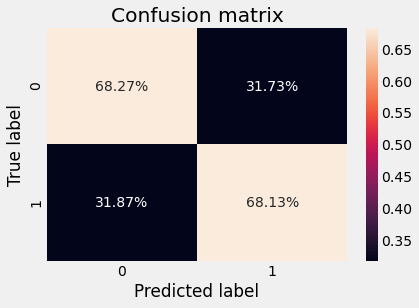

In [135]:
conf_mat_gb = confusion_matrix(y_test3, y_pred_lgbn)
conf_mat_gb = conf_mat_gb.astype(np.float)
conf_mat_gb[0] = (conf_mat_gb[0]/conf_mat_gb[0].sum())
conf_mat_gb[1] = (conf_mat_gb[1]/conf_mat_gb[1].sum())
sns.heatmap(conf_mat_gb, annot=True, fmt='.2%', cbar=True)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix')

In [136]:
test = essaiML3[essaiML3.sk_id_curr==100003]

In [137]:
test2 = test.drop(['target'], axis=1)

In [138]:
test2

,sk_id_curr,name_contract_type,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,own_car_age,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,region_rating_client,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,ext_source_1,ext_source_2,ext_source_3,apartments_avg,basementarea_avg,years_beginexpluatation_avg,years_build_avg,commonarea_avg,entrances_avg,floorsmax_avg,floorsmin_avg,landarea_avg,nonlivingapartments_avg,nonlivingarea_avg,emergencystate_mode,obs_30_cnt_social_circle,def_30_cnt_social_circle,days_last_phone_change,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year,bureau_credit_active_active_count,bureau_credit_active_active_count_norm,bureau_credit_active_bad_debt_count,bureau_credit_active_closed_count,bureau_credit_active_closed_count_norm,bureau_credit_active_sold_count,bureau_credit_active_sold_count_norm,bureau_credit_currency_currency_1_count_norm,bureau_credit_currency_currency_2_count,bureau_credit_currency_currency_2_count_norm,bureau_credit_currency_currency_3_count,bureau_credit_currency_currency_3_count_norm,bureau_credit_currency_currency_4_count,bureau_credit_type_another_type_of_loan_count,bureau_credit_type_another_type_of_loan_count_norm,bureau_credit_type_car_loan_count,bureau_credit_type_car_loan_count_norm,bureau_credit_type_cash_loan_PnonearmarkedP_count,bureau_credit_type_consumer_credit_count_norm,bureau_credit_type_credit_card_count,bureau_credit_type_credit_card_count_norm,bureau_credit_type_interbank_credit_count,bureau_credit_type_loan_for_business_development_count,bureau_credit_type_loan_for_business_development_count_norm,bureau_credit_type_loan_for_purchase_of_shares_Pmargin_lendingP_count,bureau_credit_type_loan_for_the_purchase_of_equipment_count,bureau_credit_type_loan_for_the_purchase_of_equipment_count_norm,bureau_credit_type_loan_for_working_capital_replenishment_count,bureau_credit_type_loan_for_working_capital_replenishment_count_norm,bureau_credit_type_microloan_count,bureau_credit_type_microloan_count_norm,bureau_credit_type_mobile_operator_loan_count,bureau_credit_type_mortgage_count,bureau_credit_type_mortgage_count_norm,bureau_credit_type_real_estate_loan_count,bureau_credit_type_real_estate_loan_count_norm,bureau_credit_type_unknown_type_of_loan_count,bureau_credit_type_unknown_type_of_loan_count_norm,bureau_days_credit_mean,bureau_days_credit_max,bureau_days_credit_sum,bureau_credit_day_overdue_mean,bureau_credit_day_overdue_max,bureau_credit_day_overdue_min,bureau_days_credit_enddate_mean,bureau_days_credit_enddate_max,bureau_days_credit_enddate_min,bureau_days_enddate_fact_mean,bureau_days_enddate_fact_max,bureau_amt_credit_max_overdue_count,bureau_amt_credit_max_overdue_mean,bureau_cnt_credit_prolong_mean,bureau_cnt_credit_prolong_max,bureau_cnt_credit_prolong_min,bureau_amt_credit_sum_mean,bureau_amt_credit_sum_min,bureau_amt_credit_sum_debt_mean,bureau_amt_credit_sum_debt_max,bureau_amt_credit_sum_debt_min,bureau_amt_credit_sum_limit_mean,bureau_amt_credit_sum_limit_max,bureau_amt_credit_sum_limit_min,bureau_amt_credit_sum_overdue_mean,bureau_amt_credit_sum_overdue_max,bureau_amt_credit_sum_overdue_min,bureau_days_credit_update_mean,bureau_days_credit_update_max,bureau_days_credit_update_min,bureau_amt_annuity_count,bureau_amt_annuity_mean,bureau_amt_annuity_max,bureau_amt_annuity_min,client_bureau_balance_month

In [139]:
LGBN_best_clf3.predict_proba(test2)

array([[0.7289205, 0.2710795]])

In [140]:
tt = LGBN_best_clf3.predict_proba(test2)

In [141]:
tt[:1]

array([[0.7289205, 0.2710795]])

In [142]:
LGBN_best_clf3.predict(test2)

array([0], dtype=int64)

In [143]:
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train3)

In [144]:
X_test_scaler = scaler.fit_transform(X_test3)

In [145]:
rus = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = rus.fit_resample(X_train_scaler, y_train3)

In [146]:
X_test_res, y_test_res = rus.fit_resample(X_test_scaler, y_test3)

In [147]:
clf_lgbn.fit(X_train_res, y_train_res)

LGBMClassifier(class_weight='balanced')

In [148]:
y_pred_lgbn = clf_lgbn.predict(X_test_res)

In [149]:
print_metrics(y_test_res, y_pred_lgbn)

roc_auc_score 0.6847409796412014
precision_score 0.6853483968054123
recall_score 0.6847409796412014
f1_score 0.6935136194395454


<AxesSubplot:>

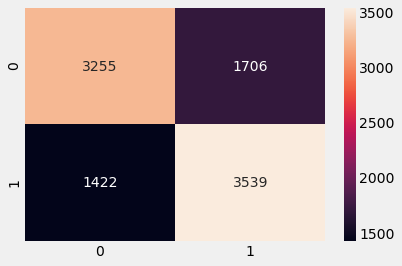

In [150]:
conf_mat_gb = confusion_matrix(y_test_res, y_pred_lgbn)
sns.heatmap(conf_mat_gb, annot=True, fmt=".0f")

In [151]:
prediction = essaiML3.drop(['target'], axis=1)

In [152]:
proba = LGBN_best_clf3.predict_proba(prediction)

In [153]:
proba[:,0]

array([0.13632121, 0.7289205 , 0.66041734, ..., 0.49838932, 0.58875998,
       0.56837271])

In [154]:
essaiML3['predictions'] = proba[:,0]

In [155]:
essaiML3.to_csv(r"C:\Users\Damien\Desktop\Data Scientist\P7\Dataset\modifie\api_model.csv", index=False)

In [156]:
essaiML3.head()

,sk_id_curr,target,name_contract_type,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,own_car_age,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,region_rating_client,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,ext_source_1,ext_source_2,ext_source_3,apartments_avg,basementarea_avg,years_beginexpluatation_avg,years_build_avg,commonarea_avg,entrances_avg,floorsmax_avg,floorsmin_avg,landarea_avg,nonlivingapartments_avg,nonlivingarea_avg,emergencystate_mode,obs_30_cnt_social_circle,def_30_cnt_social_circle,days_last_phone_change,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year,bureau_credit_active_active_count,bureau_credit_active_active_count_norm,bureau_credit_active_bad_debt_count,bureau_credit_active_closed_count,bureau_credit_active_closed_count_norm,bureau_credit_active_sold_count,bureau_credit_active_sold_count_norm,bureau_credit_currency_currency_1_count_norm,bureau_credit_currency_currency_2_count,bureau_credit_currency_currency_2_count_norm,bureau_credit_currency_currency_3_count,bureau_credit_currency_currency_3_count_norm,bureau_credit_currency_currency_4_count,bureau_credit_type_another_type_of_loan_count,bureau_credit_type_another_type_of_loan_count_norm,bureau_credit_type_car_loan_count,bureau_credit_type_car_loan_count_norm,bureau_credit_type_cash_loan_PnonearmarkedP_count,bureau_credit_type_consumer_credit_count_norm,bureau_credit_type_credit_card_count,bureau_credit_type_credit_card_count_norm,bureau_credit_type_interbank_credit_count,bureau_credit_type_loan_for_business_development_count,bureau_credit_type_loan_for_business_development_count_norm,bureau_credit_type_loan_for_purchase_of_shares_Pmargin_lendingP_count,bureau_credit_type_loan_for_the_purchase_of_equipment_count,bureau_credit_type_loan_for_the_purchase_of_equipment_count_norm,bureau_credit_type_loan_for_working_capital_replenishment_count,bureau_credit_type_loan_for_working_capital_replenishment_count_norm,bureau_credit_type_microloan_count,bureau_credit_type_microloan_count_norm,bureau_credit_type_mobile_operator_loan_count,bureau_credit_type_mortgage_count,bureau_credit_type_mortgage_count_norm,bureau_credit_type_real_estate_loan_count,bureau_credit_type_real_estate_loan_count_norm,bureau_credit_type_unknown_type_of_loan_count,bureau_credit_type_unknown_type_of_loan_count_norm,bureau_days_credit_mean,bureau_days_credit_max,bureau_days_credit_sum,bureau_credit_day_overdue_mean,bureau_credit_day_overdue_max,bureau_credit_day_overdue_min,bureau_days_credit_enddate_mean,bureau_days_credit_enddate_max,bureau_days_credit_enddate_min,bureau_days_enddate_fact_mean,bureau_days_enddate_fact_max,bureau_amt_credit_max_overdue_count,bureau_amt_credit_max_overdue_mean,bureau_cnt_credit_prolong_mean,bureau_cnt_credit_prolong_max,bureau_cnt_credit_prolong_min,bureau_amt_credit_sum_mean,bureau_amt_credit_sum_min,bureau_amt_credit_sum_debt_mean,bureau_amt_credit_sum_debt_max,bureau_amt_credit_sum_debt_min,bureau_amt_credit_sum_limit_mean,bureau_amt_credit_sum_limit_max,bureau_amt_credit_sum_limit_min,bureau_amt_credit_sum_overdue_mean,bureau_amt_credit_sum_overdue_max,bureau_amt_credit_sum_overdue_min,bureau_days_credit_update_mean,bureau_days_credit_update_max,bureau_days_credit_update_min,bureau_amt_annuity_count,bureau_amt_annuity_mean,bureau_amt_annuity_max,bureau_amt_annuity_min,client_bureau_balanc

#### Verfis

In [157]:
essaiML3.head()

,sk_id_curr,target,name_contract_type,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,own_car_age,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,region_rating_client,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,ext_source_1,ext_source_2,ext_source_3,apartments_avg,basementarea_avg,years_beginexpluatation_avg,years_build_avg,commonarea_avg,entrances_avg,floorsmax_avg,floorsmin_avg,landarea_avg,nonlivingapartments_avg,nonlivingarea_avg,emergencystate_mode,obs_30_cnt_social_circle,def_30_cnt_social_circle,days_last_phone_change,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year,bureau_credit_active_active_count,bureau_credit_active_active_count_norm,bureau_credit_active_bad_debt_count,bureau_credit_active_closed_count,bureau_credit_active_closed_count_norm,bureau_credit_active_sold_count,bureau_credit_active_sold_count_norm,bureau_credit_currency_currency_1_count_norm,bureau_credit_currency_currency_2_count,bureau_credit_currency_currency_2_count_norm,bureau_credit_currency_currency_3_count,bureau_credit_currency_currency_3_count_norm,bureau_credit_currency_currency_4_count,bureau_credit_type_another_type_of_loan_count,bureau_credit_type_another_type_of_loan_count_norm,bureau_credit_type_car_loan_count,bureau_credit_type_car_loan_count_norm,bureau_credit_type_cash_loan_PnonearmarkedP_count,bureau_credit_type_consumer_credit_count_norm,bureau_credit_type_credit_card_count,bureau_credit_type_credit_card_count_norm,bureau_credit_type_interbank_credit_count,bureau_credit_type_loan_for_business_development_count,bureau_credit_type_loan_for_business_development_count_norm,bureau_credit_type_loan_for_purchase_of_shares_Pmargin_lendingP_count,bureau_credit_type_loan_for_the_purchase_of_equipment_count,bureau_credit_type_loan_for_the_purchase_of_equipment_count_norm,bureau_credit_type_loan_for_working_capital_replenishment_count,bureau_credit_type_loan_for_working_capital_replenishment_count_norm,bureau_credit_type_microloan_count,bureau_credit_type_microloan_count_norm,bureau_credit_type_mobile_operator_loan_count,bureau_credit_type_mortgage_count,bureau_credit_type_mortgage_count_norm,bureau_credit_type_real_estate_loan_count,bureau_credit_type_real_estate_loan_count_norm,bureau_credit_type_unknown_type_of_loan_count,bureau_credit_type_unknown_type_of_loan_count_norm,bureau_days_credit_mean,bureau_days_credit_max,bureau_days_credit_sum,bureau_credit_day_overdue_mean,bureau_credit_day_overdue_max,bureau_credit_day_overdue_min,bureau_days_credit_enddate_mean,bureau_days_credit_enddate_max,bureau_days_credit_enddate_min,bureau_days_enddate_fact_mean,bureau_days_enddate_fact_max,bureau_amt_credit_max_overdue_count,bureau_amt_credit_max_overdue_mean,bureau_cnt_credit_prolong_mean,bureau_cnt_credit_prolong_max,bureau_cnt_credit_prolong_min,bureau_amt_credit_sum_mean,bureau_amt_credit_sum_min,bureau_amt_credit_sum_debt_mean,bureau_amt_credit_sum_debt_max,bureau_amt_credit_sum_debt_min,bureau_amt_credit_sum_limit_mean,bureau_amt_credit_sum_limit_max,bureau_amt_credit_sum_limit_min,bureau_amt_credit_sum_overdue_mean,bureau_amt_credit_sum_overdue_max,bureau_amt_credit_sum_overdue_min,bureau_days_credit_update_mean,bureau_days_credit_update_max,bureau_days_credit_update_min,bureau_amt_annuity_count,bureau_amt_annuity_mean,bureau_amt_annuity_max,bureau_amt_annuity_min,client_bureau_balanc

In [158]:
essaiML3 = essaiML3.drop('target', axis=1)

In [159]:
essaiML3 = essaiML3.drop('predictions', axis=1)

In [160]:
df_pred = essaiML3[essaiML3['sk_id_curr']==100004]

In [161]:
y_pred = LGBN_best_clf3.predict_proba(df_pred)   

In [162]:
y_pred[0,0]

0.6604173448113935

#### SHAP 2

In [183]:
# Import cleaned(Imputer, Encoding...) dataframe 
essaiAPI = pd.read_csv(r"C:\Users\Damien\Desktop\Data Scientist\P7\Dataset\modifie\essai3.csv")

In [209]:
essaiAPI.head(10)

,sk_id_curr,target,name_contract_type,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,own_car_age,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,region_rating_client,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,ext_source_1,ext_source_2,ext_source_3,apartments_avg,basementarea_avg,years_beginexpluatation_avg,years_build_avg,commonarea_avg,entrances_avg,floorsmax_avg,floorsmin_avg,landarea_avg,nonlivingapartments_avg,nonlivingarea_avg,emergencystate_mode,obs_30_cnt_social_circle,def_30_cnt_social_circle,days_last_phone_change,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year,bureau_credit_active_active_count,bureau_credit_active_active_count_norm,bureau_credit_active_bad_debt_count,bureau_credit_active_closed_count,bureau_credit_active_closed_count_norm,bureau_credit_active_sold_count,bureau_credit_active_sold_count_norm,bureau_credit_currency_currency_1_count_norm,bureau_credit_currency_currency_2_count,bureau_credit_currency_currency_2_count_norm,bureau_credit_currency_currency_3_count,bureau_credit_currency_currency_3_count_norm,bureau_credit_currency_currency_4_count,bureau_credit_type_another_type_of_loan_count,bureau_credit_type_another_type_of_loan_count_norm,bureau_credit_type_car_loan_count,bureau_credit_type_car_loan_count_norm,bureau_credit_type_cash_loan_PnonearmarkedP_count,bureau_credit_type_consumer_credit_count_norm,bureau_credit_type_credit_card_count,bureau_credit_type_credit_card_count_norm,bureau_credit_type_interbank_credit_count,bureau_credit_type_loan_for_business_development_count,bureau_credit_type_loan_for_business_development_count_norm,bureau_credit_type_loan_for_purchase_of_shares_Pmargin_lendingP_count,bureau_credit_type_loan_for_the_purchase_of_equipment_count,bureau_credit_type_loan_for_the_purchase_of_equipment_count_norm,bureau_credit_type_loan_for_working_capital_replenishment_count,bureau_credit_type_loan_for_working_capital_replenishment_count_norm,bureau_credit_type_microloan_count,bureau_credit_type_microloan_count_norm,bureau_credit_type_mobile_operator_loan_count,bureau_credit_type_mortgage_count,bureau_credit_type_mortgage_count_norm,bureau_credit_type_real_estate_loan_count,bureau_credit_type_real_estate_loan_count_norm,bureau_credit_type_unknown_type_of_loan_count,bureau_credit_type_unknown_type_of_loan_count_norm,bureau_days_credit_mean,bureau_days_credit_max,bureau_days_credit_sum,bureau_credit_day_overdue_mean,bureau_credit_day_overdue_max,bureau_credit_day_overdue_min,bureau_days_credit_enddate_mean,bureau_days_credit_enddate_max,bureau_days_credit_enddate_min,bureau_days_enddate_fact_mean,bureau_days_enddate_fact_max,bureau_amt_credit_max_overdue_count,bureau_amt_credit_max_overdue_mean,bureau_cnt_credit_prolong_mean,bureau_cnt_credit_prolong_max,bureau_cnt_credit_prolong_min,bureau_amt_credit_sum_mean,bureau_amt_credit_sum_min,bureau_amt_credit_sum_debt_mean,bureau_amt_credit_sum_debt_max,bureau_amt_credit_sum_debt_min,bureau_amt_credit_sum_limit_mean,bureau_amt_credit_sum_limit_max,bureau_amt_credit_sum_limit_min,bureau_amt_credit_sum_overdue_mean,bureau_amt_credit_sum_overdue_max,bureau_amt_credit_sum_overdue_min,bureau_days_credit_update_mean,bureau_days_credit_update_max,bureau_days_credit_update_min,bureau_amt_annuity_count,bureau_amt_annuity_mean,bureau_amt_annuity_max,bureau_amt_annuity_min,client_bureau_balanc

In [182]:
#essaiAPI = essaiAPI.drop('target', axis=1)

In [184]:
X_API = essaiAPI.drop('target', axis=1)
y_API = essaiAPI['target']

X_trainAPI, X_testAPI, y_trainAPI, y_testAPI = train_test_split(X_API, y_API, test_size=0.2)

In [187]:
explainerAPI = shap.TreeExplainer(clf_lgbn)
shap_values = explainer.shap_values(X_trainAPI)

In [195]:
shap_obj = explainer(X_trainAPI)

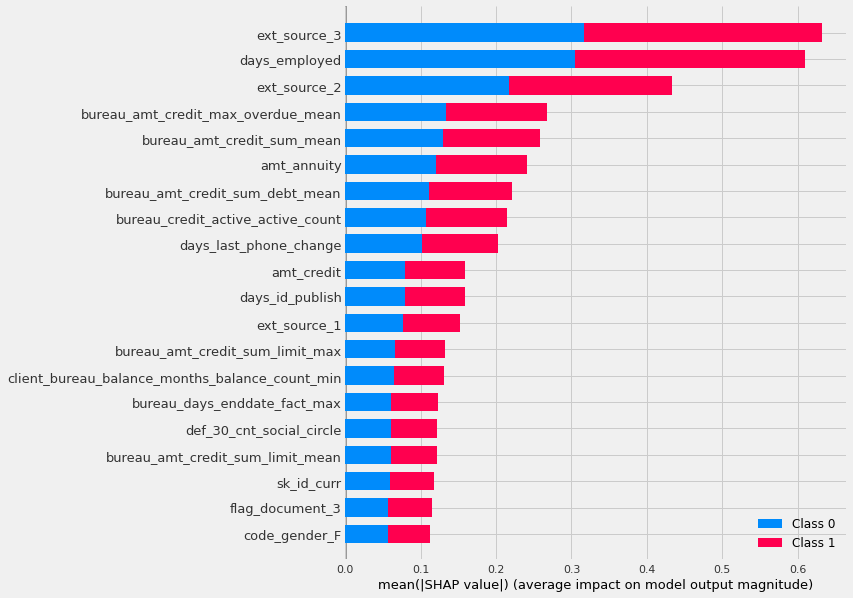

In [188]:
shap.summary_plot(shap_values, features=X_trainAPI, feature_names=X_trainAPI.columns)

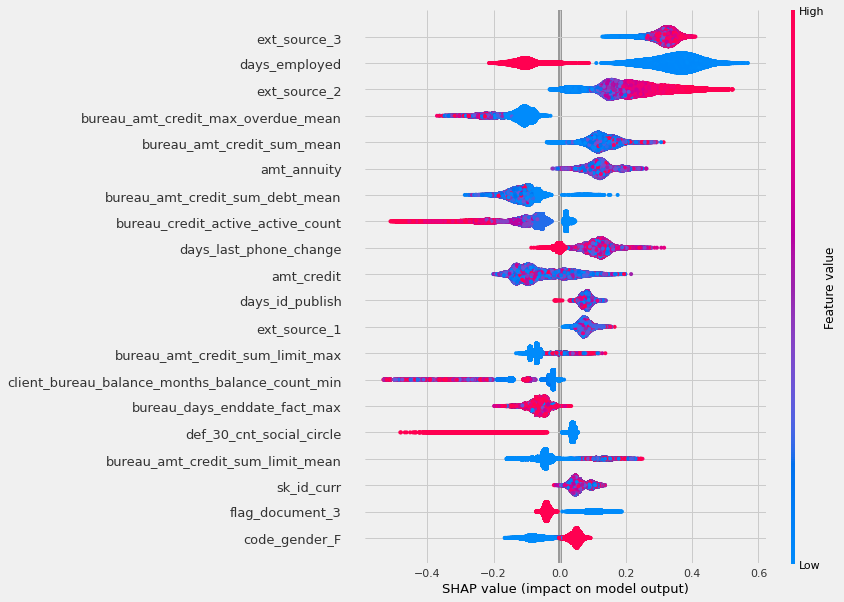

In [207]:
shap.summary_plot(shap_values=np.take(shap_obj.values, 0, axis=-1),
                  features=X_trainAPI,
                  feature_names=X_trainAPI.columns,
                  sort=True)

In [202]:
shap.plots.beeswarm(shap_obj[0,10])

ValueError: The beeswarm plot does not support plotting a single instance, please pass an explanation matrix with many instances!

In [172]:
test2 = explainer.expected_value

In [173]:
test2[0]

-0.0030344745805528086

In [177]:
shap_values[0].shape

(246008, 318)

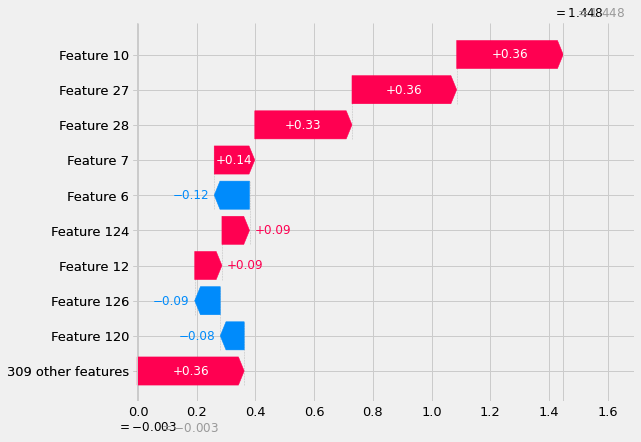

In [167]:
shap.plots._waterfall.waterfall_legacy(explainer.expected_value[0], shap_values[0][24], X_train3.columns)

In [168]:
X_train3.columns

Index(['sk_id_curr', 'name_contract_type', 'flag_own_car', 'flag_own_realty',
       'cnt_children', 'amt_income_total', 'amt_credit', 'amt_annuity',
       'region_population_relative', 'days_birth',
       ...
       'housetype_mode_block of flats', 'housetype_mode_specific housing',
       'housetype_mode_terraced house', 'wallsmaterial_mode_Block',
       'wallsmaterial_mode_Mixed', 'wallsmaterial_mode_Monolithic',
       'wallsmaterial_mode_Others', 'wallsmaterial_mode_Panel',
       'wallsmaterial_mode_Stone, brick', 'wallsmaterial_mode_Wooden'],
      dtype='object', length=318)

In [169]:
#pd.DataFrame(shap_values[0][:5000]).to_csv(r"C:\Users\Damien\Desktop\Data Scientist\P7\Dataset\shap\shap_values.shap")

In [170]:
#pd.DataFrame(shap_values[0][:5000]).to_csv(r"C:\Users\Damien\Desktop\Data Scientist\P7\Dataset\shap\shap_values_0.shap")
#pd.DataFrame(shap_values[1][:5000]).to_csv(r"C:\Users\Damien\Desktop\Data Scientist\P7\Dataset\shap\shap_values_1.shap")

In [174]:
filename = 'shap_values_0.p'
pickle.dump(shap_values[0], open(filename, 'wb'))

In [181]:
filename = 'shap_values.p'
pickle.dump(shap_values, open(filename, 'wb'))

In [ ]:
shap_url = r"C:\Users\Damien\Desktop\Data Scientist\P7\Dataset\shap\shap_values.shap"

In [ ]:
with open(shap_url, "rb") as input_file:
    shap_values = pickle.load(input_file)

In [ ]:
#filename = 'LGBN_best_clf3.sav'

In [ ]:
#pickle.dump(LGBN_best_clf3, open(filename, 'wb'))

In [ ]:
#load_model = pickle.load(open(filename, 'rb'))

In [ ]:
#r = load_model.score(X_test3, y_test3)